### Phenotypic associations of otrhologic genes in human and mouse concordance analysis.

Performed by Nadezhda Pavlova

In [47]:
#!/usr/bin/env python3

import os

import pandas as pd
from ontobio.ontol_factory import OntologyFactory
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Create directories for plots and intermediate data
PLOTS_DIR = "../pictures"
INTERMEDIATE_DATA_DIR = "../intermediate_data"
PATH_HPO = os.path.abspath("../ontologies/hpo.json")
PATH_MPO = os.path.abspath("../ontologies/mpo.json")

# function for further work with dataset
def isnan(x):
    return x != x

# ontologies upload
hpo = OntologyFactory().create(handle=PATH_HPO)
mpo = OntologyFactory().create(handle=PATH_MPO)

# databases for further analysis upload
gtex_data = pd.read_csv(
    "../databases/expression_GTEx.gct",
    delimiter="\t",
    skiprows=2,
)
gnomad_data = pd.read_csv(
    "../databases/constraint_gnomAD.txt", 
    delimiter="\t"
)

### Dataset check and basic numbers.

In [49]:
db_syst = pd.read_csv(
    "../databases/human_mouse_GPO.tsv", delimiter="\t"
)

db_syst.head()

,gene_human,entrez_id_human,gene_mouse,MGI,MP_HMD,MP_PhenoGeno,HP_genes_to_phenotype,MP_system_level,HP_system_level,MP_from_HP_system_level
0,A1BG,1,A1bg,MGI:2152878,NaN,NaN,NaN,NaN,NaN,NaN
1,A1CF,29974,A1cf,MGI:1917115,"MP:0005378,MP:0005397,MP:0005376,MP:0005367,MP...","MP:0002083,MP:0003222,MP:0003061,MP:0004231,MP...",NaN,"MP:0005378,MP:0003631,MP:0005397,MP:0005376,MP...",NaN,NaN
2,A2M,2,A2m,MGI:2449119,NaN,NaN,NaN,NaN,NaN,NaN
3,A3GALT2,127550,A3galt2,MGI:2685279,NaN,NaN,NaN,NaN,NaN,NaN
4,A4GALT,53947,A4galt,MGI:3512453,"MP:0005386,MP:0010768,MP:0005376","MP:0009747,MP:0008874,MP:0009767","HP:0000006,HP:0010970","MP:0005386,MP:0010768,MP:0005376",HP:0001871,MP:0005397


In [52]:
# assertions on number of system MP terms for mouse and human per one gene (must me no more than 25)
mouse_num_of_mp_terms = (
    db_syst.MP_system_level.value_counts()
    .reset_index()
    .rename(columns={"MP_system_level": "MPs"})
    .MPs.apply(lambda x: len(x.split(",")))
    .tolist()
)


human_num_of_mp_terms = (
    db_syst.MP_from_HP_system_level.value_counts()
    .reset_index()
    .rename(columns={"MP_from_HP_system_level": "MPs"})
    .MPs.apply(lambda x: len(x.split(",")))
    .tolist()
)

mouse_num_of_mp_terms = sorted(mouse_num_of_mp_terms, reverse=True)[0]
human_num_of_mp_terms = sorted(human_num_of_mp_terms, reverse=True)[0]

print(f"Mouse - {mouse_num_of_mp_terms}")
print(f"Human - {human_num_of_mp_terms}")

assert mouse_num_of_mp_terms <= 25
assert human_num_of_mp_terms <= 25

Mouse - 25
Human - 25


In [53]:
print("Human:")
print(f"{db_syst.HP_genes_to_phenotype.count()} genes with at least one HPO low-level term.")
print(f"{db_syst.HP_system_level.count()} genes with at least one HPO system-level term.")
print(f"{db_syst.MP_from_HP_system_level.count()} genes with at least one MPO system-level term.")
print("")


print("Mouse:")
print(f"{db_syst.MP_PhenoGeno.count()} genes with at least one MPO low-level term.")
print(f"{db_syst.MP_system_level.count()} genes with at least one MPO system-level term.")

Human:
5318 genes with at least one HPO low-level term.
5316 genes with at least one HPO system-level term.
5316 genes with at least one MPO system-level term.

Mouse:
14313 genes with at least one MPO low-level term.
13987 genes with at least one MPO system-level term.


In [54]:
# see the genes that have at least one HPO low-level term but no HPO system-level term

missed_HPOs = db_syst[
    (db_syst.HP_genes_to_phenotype.isna() == False)
    & (db_syst.HP_system_level.isna() == True)
].HP_genes_to_phenotype.unique()


for terms in missed_HPOs:
    for term in terms.split(","):
        print(term, hpo.label(term))

HP:0000006 Autosomal dominant inheritance


In [55]:
# see the genes that have at least one MPO low-level term but no MPO system-level term
# all of them have olfactory phenotype parent
# olfactory phenotype is not described in human well and is not mapped to HPO

missed_MPOs = db_syst[
    (db_syst.MP_PhenoGeno.isna() == False)
    & (db_syst.MP_system_level.isna() == True)
].MP_PhenoGeno.unique()

for terms in missed_MPOs:
    for term in terms.split(","):
        print(term, mpo.label(term))
    print()

MP:0002169 no abnormal phenotype detected

MP:0001983 abnormal olfactory system physiology

MP:0004209 abnormal sweet taste sensitivity
MP:0004210 abnormal bitter taste sensitivity
MP:0001985 abnormal gustatory system physiology
MP:0004212 abnormal salty taste sensitivity
MP:0004213 abnormal umami taste sensitivity

MP:0001983 abnormal olfactory system physiology
MP:0009562 abnormal odor adaptation

MP:0008544 impaired olfaction

MP:0004209 abnormal sweet taste sensitivity
MP:0004210 abnormal bitter taste sensitivity
MP:0001985 abnormal gustatory system physiology
MP:0004212 abnormal salty taste sensitivity
MP:0004213 abnormal umami taste sensitivity
MP:0001986 abnormal taste sensitivity

MP:0001986 abnormal taste sensitivity

MP:0008544 impaired olfaction
MP:0001983 abnormal olfactory system physiology

MP:0004210 abnormal bitter taste sensitivity

MP:0001985 abnormal gustatory system physiology
MP:0004212 abnormal salty taste sensitivity



In [56]:
# Calculate number of genes that have
# (a) no association with any phenotypic terms in mouse, but some in human (and vice versa),
# (b) some associations in both organisms, and
# (c) no associations in either species

unique_entrez_id_human = len(
    set(
        db_syst[db_syst.entrez_id_human.isna() == False]
        .entrez_id_human.apply(lambda x: list(str(x).split(",")) if not isnan(x) else x)
        .sum()
    )
)

unique_MGI = len(
    set(
        db_syst[db_syst.MGI.isna() == False]
        .MGI.apply(lambda x: list(x.split(",")) if not isnan(x) else x)
        .sum()
    )
)
unique_MP_HMD = len(
    set(
        db_syst[db_syst.MP_HMD.isna() == False]
        .MP_HMD.apply(lambda x: list(x.split(",")) if not isnan(x) else x)
        .sum()
    )
)
unique_MP_PhenoGeno = len(
    set(
        db_syst[db_syst.MP_PhenoGeno.isna() == False]
        .MP_PhenoGeno.apply(lambda x: list(x.split(",")) if not isnan(x) else x)
        .sum()
    )
)
unique_HP_genes_to_phenotype = len(
    set(
        db_syst[db_syst.HP_genes_to_phenotype.isna() == False]
        .HP_genes_to_phenotype.apply(
            lambda x: list(x.split(",")) if not isnan(x) else x
        )
        .sum()
    )
)
unique_MP_system_level = len(
    set(
        db_syst[db_syst.MP_system_level.isna() == False]
        .MP_system_level.apply(lambda x: list(x.split(",")) if not isnan(x) else x)
        .sum()
    )
)
unique_HP_system_level = len(
    set(
        db_syst[db_syst.HP_system_level.isna() == False]
        .HP_system_level.apply(lambda x: list(x.split(",")) if not isnan(x) else x)
        .sum()
    )
)
unique_MP_from_HP_system_level = len(
    set(
        db_syst[db_syst.MP_from_HP_system_level.isna() == False]
        .MP_from_HP_system_level.apply(
            lambda x: list(x.split(",")) if not isnan(x) else x
        )
        .sum()
    )
)


print(f"""
number of unique entrez_id_human: {unique_entrez_id_human}
number of unique MGI: {unique_MGI}
number of unique MP_HMD: {unique_MP_HMD}
number of unique MP_PhenoGeno: {unique_MP_PhenoGeno}
number of unique HP_genes_to_phenotype: {unique_HP_genes_to_phenotype}
number of unique MP_system_level: {unique_MP_system_level}
number of unique HP_system_level: {unique_HP_system_level}
number of unique MP_from_HP_system_level: {unique_MP_from_HP_system_level}
"""
)


number of unique entrez_id_human: 19326
number of unique MGI: 20131
number of unique MP_HMD: 27
number of unique MP_PhenoGeno: 10693
number of unique HP_genes_to_phenotype: 9310
number of unique MP_system_level: 25
number of unique HP_system_level: 91
number of unique MP_from_HP_system_level: 25



In [57]:
# Are unique MP_system_level terms and unique MP_from_HP_system_level terms identique?
# + let's see what these terms are

unique_MPs_system_level_mouse = set(
    db_syst[db_syst.MP_system_level.isna() == False]
    .MP_system_level.apply(lambda x: list(x.split(",")) if not isnan(x) else x)
    .sum()
)

unique_MPs_system_level_human = set(
    db_syst[db_syst.MP_from_HP_system_level.isna() == False]
    .MP_from_HP_system_level.apply(lambda x: list(x.split(",")) if not isnan(x) else x)
    .sum()
)

print(unique_MPs_system_level_mouse == unique_MPs_system_level_human)
print()
for term in unique_MPs_system_level_human:
    print(term, mpo.label(term))

True

MP:0005386 behavior/neurological phenotype
MP:0005391 vision/eye phenotype
MP:0005375 adipose tissue phenotype
MP:0005387 immune system phenotype
MP:0005379 endocrine/exocrine gland phenotype
MP:0005385 cardiovascular system phenotype
MP:0005397 hematopoietic system phenotype
MP:0005376 homeostasis/metabolism phenotype
MP:0005389 reproductive system phenotype
MP:0005378 growth/size/body region phenotype
MP:0005390 skeleton phenotype
MP:0005369 muscle phenotype
MP:0010768 mortality/aging
MP:0005367 renal/urinary system phenotype
MP:0010771 integument phenotype
MP:0005371 limbs/digits/tail phenotype
MP:0005382 craniofacial phenotype
MP:0005380 embryo phenotype
MP:0005377 hearing/vestibular/ear phenotype
MP:0005381 digestive/alimentary phenotype
MP:0002006 neoplasm
MP:0005388 respiratory system phenotype
MP:0005384 cellular phenotype
MP:0005370 liver/biliary system phenotype
MP:0003631 nervous system phenotype


In [58]:
group_a_humn = db_syst[
    db_syst.MP_system_level.isna() & (db_syst.MP_from_HP_system_level.isna() == False)
]

group_a_mouse = db_syst[
    (db_syst.MP_system_level.isna() == False) & db_syst.MP_from_HP_system_level.isna()
]

group_b_both = db_syst[
    (db_syst.MP_system_level.isna() == False)
    & (db_syst.MP_from_HP_system_level.isna() == False)
]

group_c_neither = db_syst[
    (db_syst.MP_system_level.isna() == True)
    & (db_syst.MP_from_HP_system_level.isna() == True)
]

print("Number of genes that have no association with any phenotypic terms in mouse, but some in human: group_a_humn", 
      group_a_humn.shape[0])
print("Proportion of genes that have no association with any phenotypic terms in mouse, but some in human: group_a_humn", 
      round(group_a_humn.shape[0] / db_syst.shape[0], 3))

print("\nNumber of genes that have no association with any phenotypic terms in human, but some in mouse: group_a_mouse", 
      group_a_mouse.shape[0])
print("Proportion of genes that have no association with any phenotypic terms in human, but some in mouse: group_a_mouse", 
      round(group_a_mouse.shape[0] / db_syst.shape[0], 3))

print("\nNumber of genes that have some associations with any phenotypic terms in both organisms: group_b_both", 
      group_b_both.shape[0])
print("Proportion of genes that have some associations with any phenotypic terms in both organisms: group_b_both", 
      round(group_b_both.shape[0] / db_syst.shape[0], 3))

print("\nNumber of genes that have no associations with any phenotypic terms in both organisms: group_c_neither", 
      group_c_neither.shape[0])
print("Proportion of genes that have no associations with any phenotypic terms in both organisms: group_c_neither", 
      round(group_c_neither.shape[0] / db_syst.shape[0], 3))


Number of genes that have no association with any phenotypic terms in mouse, but some in human: group_a_humn 854
Proportion of genes that have no association with any phenotypic terms in mouse, but some in human: group_a_humn 0.029

Number of genes that have no association with any phenotypic terms in human, but some in mouse: group_a_mouse 9525
Proportion of genes that have no association with any phenotypic terms in human, but some in mouse: group_a_mouse 0.321

Number of genes that have some associations with any phenotypic terms in both organisms: group_b_both 4462
Proportion of genes that have some associations with any phenotypic terms in both organisms: group_b_both 0.15

Number of genes that have no associations with any phenotypic terms in both organisms: group_c_neither 14845
Proportion of genes that have no associations with any phenotypic terms in both organisms: group_c_neither 0.5


In [59]:
group_shapes_sum = group_a_humn.shape[0] + group_a_mouse.shape[0] + group_b_both.shape[0] + group_c_neither.shape[0] 
another_assert = group_shapes_sum == db_syst.shape[0]

print(f"Nubmer of human-mouse orthologues in the dataset {db_syst.shape[0]}")
print(f"Another assert: {another_assert}")

Nubmer of human-mouse orthologues in the dataset 29686
Another assert: True


In [60]:
# For genes in the "b" category above, calculate the proportion of genes that have
# discordant terms on lower-level and systems-level

group_b_both[
    group_b_both.MP_system_level.apply(lambda x: sorted(x.split(",")))
    == group_b_both.MP_from_HP_system_level.apply(lambda x: sorted(x.split(",")))
]

group_b_both_equal = group_b_both[
    group_b_both.MP_system_level.apply(lambda x: sorted(x.split(",")))
    == group_b_both.MP_from_HP_system_level.apply(lambda x: sorted(x.split(",")))
]

group_b_both_different = group_b_both[
    group_b_both.MP_system_level.apply(lambda x: sorted(x.split(",")))
    != group_b_both.MP_from_HP_system_level.apply(lambda x: sorted(x.split(",")))
]
group_b_both_different.shape[0]

print(f"Group B both equal: {group_b_both_equal.shape[0]}")
print(f"Group B both different: {group_b_both_different.shape[0]}")

Group B both equal: 21
Group B both different: 4441


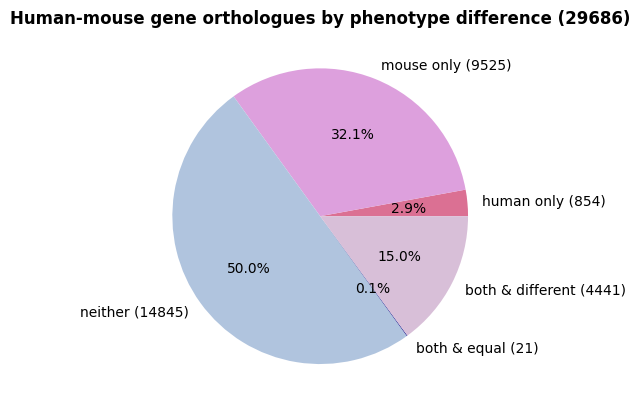

In [61]:
plt.pie(
    [
        group_a_humn.shape[0],
        group_a_mouse.shape[0],
        group_c_neither.shape[0],
        group_b_both_equal.shape[0],
        group_b_both_different.shape[0],
    ],
    labels=[
        f"human only ({group_a_humn.shape[0]})",
        f"mouse only ({group_a_mouse.shape[0]})",
        f"neither ({group_c_neither.shape[0]})",
        f"both & equal ({group_b_both_equal.shape[0]})",
        f"both & different ({group_b_both_different.shape[0]})",
    ],
    colors=["palevioletred", "plum", "lightsteelblue", "navy", "thistle"],
    autopct="%1.1f%%",
)

plt.title(
    f"Human-mouse gene orthologues by phenotype difference ({db_syst.shape[0]})",
    weight="bold",
)

plt.show()

In [75]:
# Filtering the database by monosemantic feature

gene_count_human = (
    pd.DataFrame(db_syst.entrez_id_human.value_counts())
    .reset_index()
    .rename(columns={"count": "count_human"})
)

gene_count_mouse = (
    pd.DataFrame(db_syst.MGI.value_counts())
    .reset_index()
    .rename(columns={"count": "count_mouse"})
)

db_syst_gene_count = db_syst.merge(
    gene_count_human, on="entrez_id_human", how="left"
).merge(gene_count_mouse, on="MGI", how="left")

db_syst_monosemantic = db_syst_gene_count[
    (db_syst_gene_count.count_human == 1) & (db_syst_gene_count.count_mouse == 1)
]

print(f"DB syst monosematic: {db_syst_monosemantic.shape[0]}")

DB syst monosematic: 16985


In [76]:
db_syst[db_syst.entrez_id_human == 388523]

,gene_human,entrez_id_human,gene_mouse,MGI,MP_HMD,MP_PhenoGeno,HP_genes_to_phenotype,MP_system_level,HP_system_level,MP_from_HP_system_level
28916,ZNF728,388523,2610044O15Rik8,MGI:1919389,NaN,NaN,NaN,NaN,NaN,NaN
28917,ZNF728,388523,5430403G16Rik,MGI:1924450,NaN,NaN,NaN,NaN,NaN,NaN
28918,ZNF728,388523,9130023H24Rik,MGI:2442738,NaN,NaN,NaN,NaN,NaN,NaN
28919,ZNF728,388523,Gm10778,MGI:3809656,NaN,NaN,NaN,NaN,NaN,NaN
28920,ZNF728,388523,Gm11007,MGI:3779223,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
28978,ZNF728,388523,Zfp971,MGI:1261426,NaN,NaN,NaN,NaN,NaN,NaN
28979,ZNF728,388523,Zfp975,MGI:3648690,NaN,NaN,NaN,NaN,NaN,NaN
28980,ZNF728,388523,Zfp976,MGI:3036263,NaN,NaN,NaN,NaN,NaN,NaN
28981,ZNF728,388523,Zfp997,MGI:3642406,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Same groups count for monosemantic dataset

group_a_human_mono = db_syst_monosemantic[
    db_syst_monosemantic.MP_system_level.isna()
    & (db_syst_monosemantic.MP_from_HP_system_level.isna() == False)
]
group_a_mouse_mono = db_syst_monosemantic[
    (db_syst_monosemantic.MP_system_level.isna() == False)
    & db_syst_monosemantic.MP_from_HP_system_level.isna()
]
group_b_both_mono = db_syst_monosemantic[
    (db_syst_monosemantic.MP_system_level.isna() == False)
    & (db_syst_monosemantic.MP_from_HP_system_level.isna() == False)
]
group_c_neither_mono = db_syst_monosemantic[
    (db_syst_monosemantic.MP_system_level.isna() == True)
    & (db_syst_monosemantic.MP_from_HP_system_level.isna() == True)
]


print("Monosemantic entrez_id_human-MGI relations:\n")

print("Number of genes that have no association with any phenotypic terms in mouse, but some in human: group_a_humn", 
      group_a_human_mono.shape[0])
print("Proportion of genes that have no association with any phenotypic terms in mouse, but some in human: group_a_humn", 
      round(group_a_human_mono.shape[0] / db_syst_monosemantic.shape[0], 3))

print("\nNumber of genes that have no association with any phenotypic terms in human, but some in mouse: group_a_mouse", 
      group_a_mouse_mono.shape[0])
print("Proportion of genes that have no association with any phenotypic terms in human, but some in mouse: group_a_mouse", 
      round(group_a_mouse_mono.shape[0] / db_syst_monosemantic.shape[0], 3))

print("\nNumber of genes that have some associations with any phenotypic terms in both organisms: group_b_both", 
      group_b_both_mono.shape[0])
print("Proportion of genes that have some associations with any phenotypic terms in both organisms: group_b_both", 
      round(group_b_both_mono.shape[0] / db_syst_monosemantic.shape[0], 3))

print("\nNumber of genes that have no associations with any phenotypic terms in both organisms: group_c_neither", 
      group_c_neither_mono.shape[0])
print("Proportion of genes that have no associations with any phenotypic terms in both organisms: group_c_neither", 
      round(group_c_neither_mono.shape[0] / db_syst_monosemantic.shape[0], 3))


Monosemantic entrez_id_human-MGI relations:

Number of genes that have no association with any phenotypic terms in mouse, but some in human: group_a_humn 416
Proportion of genes that have no association with any phenotypic terms in mouse, but some in human: group_a_humn 0.024

Number of genes that have no association with any phenotypic terms in human, but some in mouse: group_a_mouse 7914
Proportion of genes that have no association with any phenotypic terms in human, but some in mouse: group_a_mouse 0.466

Number of genes that have some associations with any phenotypic terms in both organisms: group_b_both 4184
Proportion of genes that have some associations with any phenotypic terms in both organisms: group_b_both 0.246

Number of genes that have no associations with any phenotypic terms in both organisms: group_c_neither 4471
Proportion of genes that have no associations with any phenotypic terms in both organisms: group_c_neither 0.263


In [78]:
mono_shapes_sum = (
    group_a_human_mono.shape[0]
    + group_a_mouse_mono.shape[0]
    + group_b_both_mono.shape[0]
    + group_c_neither_mono.shape[0]
)

another_assert = mono_shapes_sum == db_syst_monosemantic.shape[0]
print(f"Another assert: {another_assert}")

group_b_botn_equal_mono = group_b_both_mono[
    group_b_both_mono.MP_system_level.apply(lambda x: sorted(x.split(",")))
    == group_b_both_mono.MP_from_HP_system_level.apply(lambda x: sorted(x.split(",")))
]
group_b_botn_equal_mono.shape[0]


group_b_both_different_mono = group_b_both_mono[
    group_b_both_mono.MP_system_level.apply(lambda x: sorted(x.split(",")))
    != group_b_both_mono.MP_from_HP_system_level.apply(lambda x: sorted(x.split(",")))
]
group_b_both_different_mono.shape[0]

print("For monosemantic dataset:")
print(f"Group B both equal: {group_b_botn_equal_mono.shape[0]}")
print(f"Group B both different: {group_b_both_different_mono.shape[0]}")

Another assert: True
For monosemantic dataset:
Group B both equal: 15
Group B both different: 4169


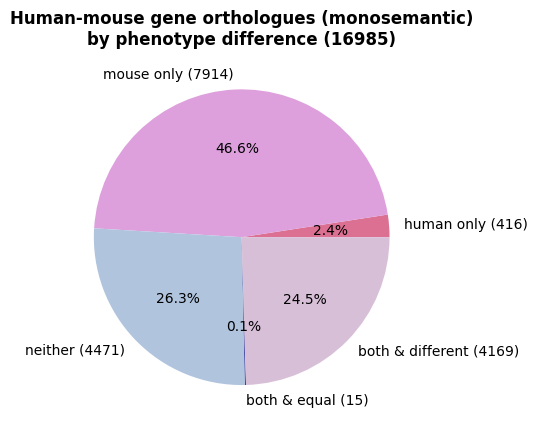

In [79]:
plt.pie(
    [
        group_a_human_mono.shape[0],
        group_a_mouse_mono.shape[0],
        group_c_neither_mono.shape[0],
        group_b_botn_equal_mono.shape[0],
        group_b_both_different_mono.shape[0],
    ],
    labels=[
        f"human only ({group_a_human_mono.shape[0]})",
        f"mouse only ({group_a_mouse_mono.shape[0]})",
        f"neither ({group_c_neither_mono.shape[0]})",
        f"both & equal ({group_b_botn_equal_mono.shape[0]})",
        f"both & different ({group_b_both_different_mono.shape[0]})",
    ],
    colors=["palevioletred", "plum", "lightsteelblue", "navy", "thistle"],
    autopct="%1.1f%%",
)

plt.title(
    f"Human-mouse gene orthologues (monosemantic)\nby phenotype difference ({db_syst_monosemantic.shape[0]})",
    weight="bold",
)

plt.show()

''

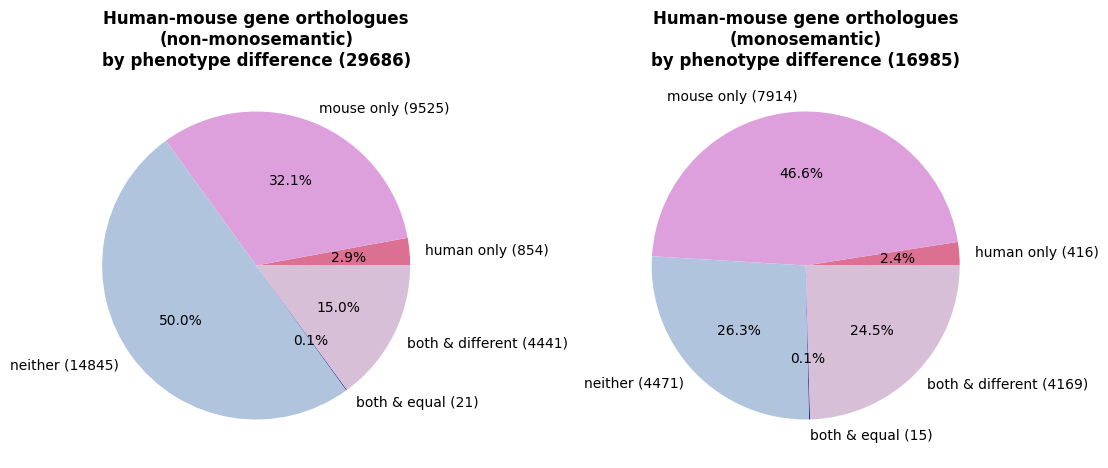

In [80]:
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)

plt.pie(
    [
        group_a_humn.shape[0],
        group_a_mouse.shape[0],
        group_c_neither.shape[0],
        group_b_both_equal.shape[0],
        group_b_both_different.shape[0],
    ],
    labels=[
        f"human only ({group_a_humn.shape[0]})",
        f"mouse only ({group_a_mouse.shape[0]})",
        f"neither ({group_c_neither.shape[0]})",
        f"both & equal ({group_b_both_equal.shape[0]})",
        f"both & different ({group_b_both_different.shape[0]})",
    ],
    colors=["palevioletred", "plum", "lightsteelblue", "navy", "thistle"],
    autopct="%1.1f%%",
)

plt.title(
    f"Human-mouse gene orthologues\n(non-monosemantic)\nby phenotype difference ({db_syst.shape[0]})",
    weight="bold",
)

plt.subplot(1, 2, 2)

plt.pie(
    [
        group_a_human_mono.shape[0],
        group_a_mouse_mono.shape[0],
        group_c_neither_mono.shape[0],
        group_b_botn_equal_mono.shape[0],
        group_b_both_different_mono.shape[0],
    ],
    labels=[
        f"human only ({group_a_human_mono.shape[0]})",
        f"mouse only ({group_a_mouse_mono.shape[0]})",
        f"neither ({group_c_neither_mono.shape[0]})",
        f"both & equal ({group_b_botn_equal_mono.shape[0]})",
        f"both & different ({group_b_both_different_mono.shape[0]})",
    ],
    colors=["palevioletred", "plum", "lightsteelblue", "navy", "thistle"],
    autopct="%1.1f%%",
)

plt.title(
    f"Human-mouse gene orthologues\n(monosemantic)\nby phenotype difference ({db_syst_monosemantic.shape[0]})",
    weight="bold",
)
plt.savefig(f"{PLOTS_DIR}/concord_02_groups_pleiotropy", bbox_inches="tight", dpi=800)
("")

In [81]:
# Splitting "both & different group" by each organism phenotypic terms contribution

print(f"Group B both different mono columns: {group_b_both_different_mono.columns}")

group_b_both_different_mono[
    "MP_system_level_set"
] = group_b_both_different_mono.MP_system_level.apply(lambda x: set(x.split(",")))
group_b_both_different_mono[
    "MP_from_HP_system_level_set"
] = group_b_both_different_mono.MP_from_HP_system_level.apply(
    lambda x: set(x.split(","))
)


group_b_both_different_mono_hum_bigger = (
    group_b_both_different_mono.apply(
        lambda x: x["MP_system_level_set"].issubset(x["MP_from_HP_system_level_set"]),
        axis=1,
    )
    .astype(int)
    .sum()
)

group_b_both_different_mono_m_bigger = (
    group_b_both_different_mono.apply(
        lambda x: x["MP_system_level_set"].issuperset(x["MP_from_HP_system_level_set"]),
        axis=1,
    )
    .astype(int)
    .sum()
)

group_b_both_different_mono_both_contribute = (
    group_b_both_different_mono.shape[0]
    - group_b_both_different_mono_hum_bigger
    - group_b_both_different_mono_m_bigger
)

Group B both different mono columns: Index(['gene_human', 'entrez_id_human', 'gene_mouse', 'MGI', 'MP_HMD',
       'MP_PhenoGeno', 'HP_genes_to_phenotype', 'MP_system_level',
       'HP_system_level', 'MP_from_HP_system_level', 'count_human',
       'count_mouse'],
      dtype='object')


/tmp/ipykernel_52830/3895876366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b_both_different_mono[
/tmp/ipykernel_52830/3895876366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b_both_different_mono[


In [82]:
# subset of data with different and non-including one another MPO terms
g_b_both_contr = group_b_both_different_mono[
    (
        group_b_both_different_mono.apply(
            lambda x: x["MP_system_level_set"].issubset(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        == False
    )
    & (
        group_b_both_different_mono.apply(
            lambda x: x["MP_system_level_set"].issuperset(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        == False
    )
]

# subset of non-intersecting MPO terms
g_b_both_contr_non_intersect = (
    (
        g_b_both_contr.apply(
            lambda x: x["MP_system_level_set"].intersection(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        == set()
    )
    .astype(int)
    .sum()
)

# subset of intersecting MPO terms
g_b_both_contr_intersect = (
    (
        g_b_both_contr.apply(
            lambda x: x["MP_system_level_set"].intersection(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        != set()
    )
    .astype(int)
    .sum()
)

print(f"Group B both contr non-intersect: {g_b_both_contr_non_intersect}")
print(f"Group B both contr intersect: {g_b_both_contr_intersect}")

Group B both contr non-intersect: 385
Group B both contr intersect: 3115


In [83]:
# Jaccard index for both contributing

g_b_both_contr["Jaccard"] = g_b_both_contr.apply(
    lambda x: len(
        x["MP_system_level_set"].intersection(x["MP_from_HP_system_level_set"])
    )
    / len(x["MP_system_level_set"].union(x["MP_from_HP_system_level_set"])),
    axis=1
)

g_b_both_contr["len_intersection"] = g_b_both_contr.apply(
    lambda x: len(
        x["MP_system_level_set"].intersection(x["MP_from_HP_system_level_set"])
    ),
    axis=1
)

/tmp/ipykernel_52830/3940627961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_b_both_contr["Jaccard"] = g_b_both_contr.apply(
/tmp/ipykernel_52830/3940627961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_b_both_contr["len_intersection"] = g_b_both_contr.apply(


''

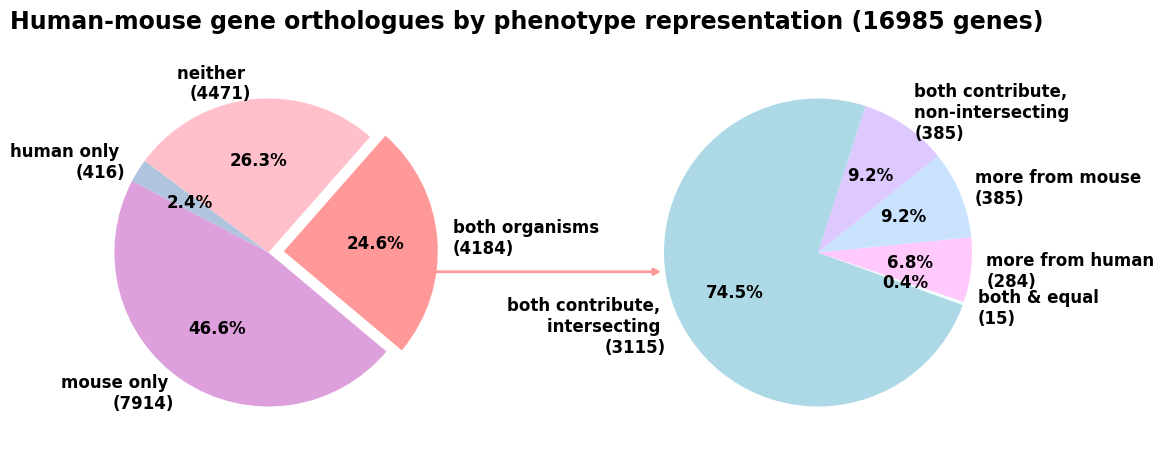

In [84]:
# For final report
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)

plt.pie(
    [
        group_a_mouse_mono.shape[0],
        group_a_human_mono.shape[0],
        group_c_neither_mono.shape[0],
        group_b_botn_equal_mono.shape[0] + group_b_both_different_mono.shape[0],
    ],
    labels=[
        f"mouse only \n({group_a_mouse_mono.shape[0]})",
        f"human only \n({group_a_human_mono.shape[0]})",
        f"neither \n({group_c_neither_mono.shape[0]})",
        f"both organisms \n({group_b_botn_equal_mono.shape[0] + group_b_both_different_mono.shape[0]})",
    ],
    colors=["plum", "lightsteelblue", "pink", "#FF9898"],
    autopct="%1.1f%%",
    counterclock=False,
    startangle=320,
    textprops={"fontsize": 12, "weight": "bold"},
    labeldistance=1.1,
    explode=(0, 0, 0, 0.1)
)

plt.subplot(1, 2, 2)

plt.pie(
    [
        group_b_botn_equal_mono.shape[0],
        group_b_both_different_mono_hum_bigger,
        group_b_both_different_mono_m_bigger,
        g_b_both_contr_non_intersect,
        g_b_both_contr_intersect,
    ],
    labels=[
        f"both & equal \n({group_b_botn_equal_mono.shape[0]})",
        f"more from human \n({group_b_both_different_mono_hum_bigger})",
        f"more from mouse \n({group_b_both_different_mono_m_bigger})",
        f"both contribute, \nnon-intersecting \n({g_b_both_contr_non_intersect})",
        f"both contribute, \nintersecting \n({g_b_both_contr_intersect})",
    ],
    colors=["azure", "#FFC9FB", "#C9E3FF", "#DDC9FF", "lightblue"],
    autopct="%1.1f%%",
    startangle=340,
    textprops={"fontsize": 12, "weight": "bold"},
    labeldistance=1.1,
)

plt.annotate(
    "", 
    xy=(0.1, 0.45), 
    xycoords='axes fraction', 
    xytext=(-0.55, 0.45),
    arrowprops=dict(
        arrowstyle='->', 
        linewidth=2, 
        color='#FF9898'
    )
)

plt.suptitle(
    f"Human-mouse gene orthologues by phenotype representation ({db_syst_monosemantic.shape[0]} genes)",
    weight="bold",
    size=17,
)
plt.savefig(f"{PLOTS_DIR}/concord_03_orthologues_representation", bbox_inches="tight", dpi=800)
("")

''

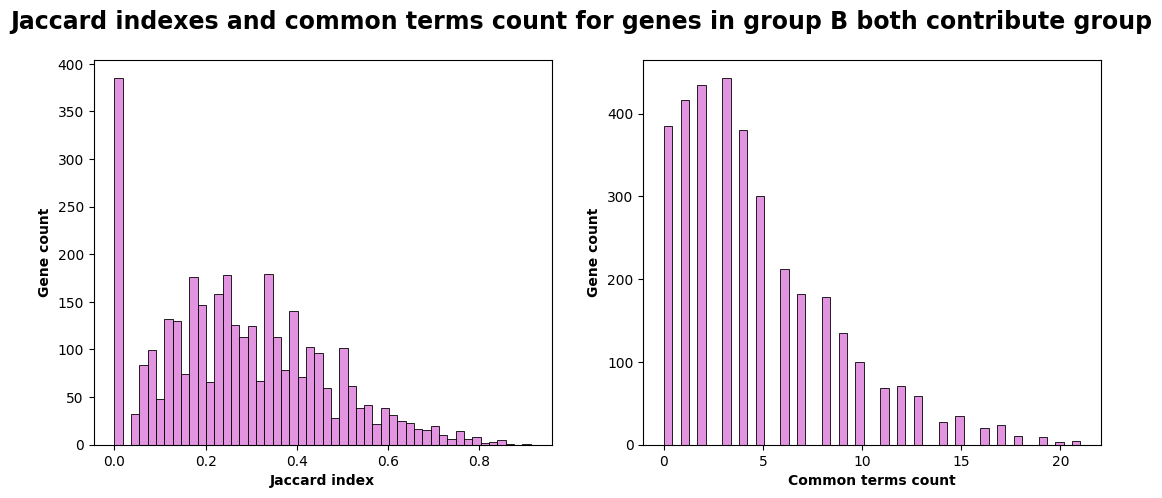

In [85]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)

sns.histplot(data=g_b_both_contr, x="Jaccard", bins=50, color="orchid")
plt.xlabel("Jaccard index", weight="bold")
plt.ylabel("Gene count", weight="bold")

plt.subplot(1, 2, 2)

sns.histplot(data=g_b_both_contr, x="len_intersection", bins=50, color="orchid")
plt.xlabel("Common terms count", weight="bold")
plt.ylabel("Gene count", weight="bold")

plt.suptitle(
    "Jaccard indexes and common terms count for genes in group B both contribute group",
    weight="bold",
    size=17,
)
plt.savefig(f"{PLOTS_DIR}/concord_04_Jaccard_term_count_for_genes", bbox_inches="tight", dpi=800)
("")

In [86]:
# 15 both & equal genes analysis + Jaccard index for both contribute (3526) on overlapping the MP lists

group_b_botn_equal_mono

,gene_human,entrez_id_human,gene_mouse,MGI,MP_HMD,MP_PhenoGeno,HP_genes_to_phenotype,MP_system_level,HP_system_level,MP_from_HP_system_level,count_human,count_mouse
1306,ASTL,431705,Astl,MGI:3046414,MP:0005389,"MP:0001923,MP:0001935","HP:0011462,HP:0000007,HP:0008222",MP:0005389,HP:0000078,MP:0005389,1,1
3188,CFD,1675,Cfd,MGI:87931,MP:0005387,"MP:0002412,MP:0002169,MP:0002472","HP:0003828,HP:0004431,HP:0000007,HP:0002718",MP:0005387,HP:0002715,MP:0005387,1,1
3929,CRYBA2,1412,Cryba2,MGI:104336,MP:0005391,"MP:0010263,MP:0001312,MP:0001306,MP:0010251","HP:0000006,HP:0000519,HP:0000501,HP:0000545",MP:0005391,HP:0000478,MP:0005391,1,1
3938,CRYGB,1419,Crygb,MGI:88522,MP:0005391,"MP:0002840,MP:0010254,MP:0010262,MP:0001303","HP:0001134,HP:0003577,HP:0000519,HP:0000006,HP...",MP:0005391,HP:0000478,MP:0005391,1,1
3944,CRYGS,1427,Crygs,MGI:1298216,MP:0005391,"MP:0010263,MP:0002579,MP:0001303,MP:0002840,MP...","HP:0010922,HP:0000518,HP:0000006",MP:0005391,HP:0000478,MP:0005391,1,1
7143,GJA3,2700,Gja3,MGI:95714,MP:0005391,"MP:0001304,MP:0010254,MP:0001297,MP:0001303","HP:0000006,HP:0010920",MP:0005391,HP:0000478,MP:0005391,1,1
7406,GPR179,440435,Gpr179,MGI:2443409,MP:0005391,"MP:0004022,MP:0004021","HP:0007984,HP:0007663,HP:0000639,HP:0030639,HP...",MP:0005391,HP:0000478,MP:0005391,1,1
7497,GRHPR,9380,Grhpr,MGI:1923488,"MP:0005367,MP:0005387,MP:0005376","MP:0009642,MP:0003197,MP:0009646,MP:0005360,MP...","HP:0008672,HP:0000007,HP:0000790,HP:0000121,HP...","MP:0005376,MP:0005367,MP:0005387","HP:0000079,HP:0002715,HP:0001939","MP:0005367,MP:0005387,MP:0005376",1,1
13001,LIM2,3982,Lim2,MGI:104698,MP:0005391,"MP:0001297,MP:0010263,MP:0002697,MP:0011697,MP...","HP:0000007,HP:0000646,HP:0000639,HP:0007780",MP:0005391,HP:0000478,MP:0005391,1,1
14050,MIP,4284,Mip,MGI:96990,MP:0005391,"MP:0005253,MP:0010263,MP:0001297,MP:0011697,MP...","HP:0000519,HP:0100018,HP:0000518,HP:0100019,HP...",MP:0005391,HP:0000478,MP:0005391,1,1


/tmp/ipykernel_52830/1870693789.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b_botn_equal_mono[


''

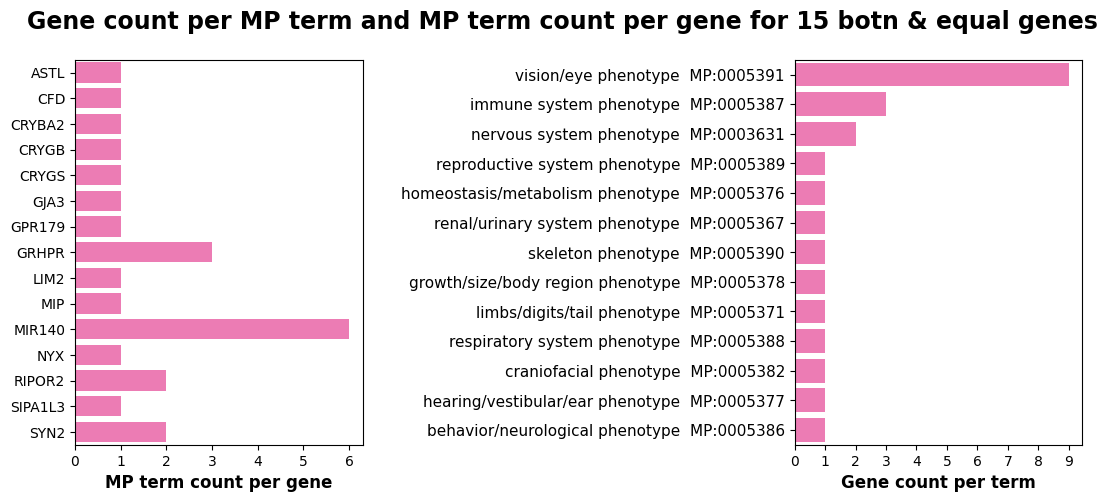

In [87]:
# For 15 equal genes calculate and plot gene count per MP and MP count per gene

mp_count_equal = dict()

for gene in group_b_botn_equal_mono.MP_system_level.tolist():
    for mp in gene.split(","):
        if mp not in mp_count_equal.keys():
            mp_count_equal[mp] = 1
        else:
            mp_count_equal[mp] += 1

mp_count_equal_df = (
    pd.DataFrame.from_dict(mp_count_equal, orient="index")
    .reset_index()
    .rename(columns={"index": "MP_term", 0: "gene_count"})
    .sort_values(by="gene_count", ascending=False)
)

group_b_botn_equal_mono[
    "term_count"
] = group_b_botn_equal_mono.MP_from_HP_system_level.apply(lambda x: len(x.split(",")))

plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 2)

sns.barplot(data=mp_count_equal_df, y="MP_term", x="gene_count", color="hotpink")
plt.yticks(
    ticks=[i for i in range(13)],
    labels=[
        f"{mpo.label(mp_count_equal_df.MP_term.tolist()[i])}  {mp_count_equal_df.MP_term.tolist()[i]}"
        for i in range(13)
    ],
    size=11,
)
plt.xticks(ticks=list(range(10)))
plt.xlabel("Gene count per term", weight="bold", size=12)
plt.ylabel("")

plt.subplot(1, 2, 1)

sns.barplot(
    data=group_b_botn_equal_mono, x="term_count", y="gene_human", color="hotpink"
)
plt.xticks(ticks=list(range(7)))
plt.xlabel(
    "MP term count per gene", weight="bold", size=12
)
plt.ylabel("")

plt.subplots_adjust(wspace=1.5)

plt.suptitle(
    "Gene count per MP term and MP term count per gene for 15 botn & equal genes",
    weight="bold",
    size=17
)

plt.savefig(f"{PLOTS_DIR}/concord_05_both_equal_gene_count_mp_count", bbox_inches="tight", dpi=800)
("")

In [88]:
# 385 both contribute, not intersecting: MP terms analysis

g_b_both_contr_non_intersect_df = g_b_both_contr[
    (
        g_b_both_contr.apply(
            lambda x: x["MP_system_level_set"].intersection(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        == set()
    )
]

g_b_both_contr_non_intersect_df.head()

,gene_human,entrez_id_human,gene_mouse,MGI,MP_HMD,MP_PhenoGeno,HP_genes_to_phenotype,MP_system_level,HP_system_level,MP_from_HP_system_level,count_human,count_mouse,MP_system_level_set,MP_from_HP_system_level_set,Jaccard,len_intersection
4,A4GALT,53947,A4galt,MGI:3512453,"MP:0005386,MP:0010768,MP:0005376","MP:0009747,MP:0008874,MP:0009767","HP:0000006,HP:0010970","MP:0005386,MP:0010768,MP:0005376",HP:0001871,MP:0005397,1,1,"{MP:0010768, MP:0005386, MP:0005376}",{MP:0005397},0.0,0
41,ABCA5,23461,Abca5,MGI:2386607,"MP:0005379,MP:0005376,MP:0005386,MP:0005391,MP...","MP:0004696,MP:0002083,MP:0002750,MP:0002795,MP...","HP:0001250,HP:0002353,HP:0000169,HP:0100543,HP...","MP:0005379,MP:0005391,MP:0005376,MP:0005386,MP...","HP:0001574,HP:0002664,HP:0000707,HP:0000234","MP:0002006,MP:0010771,MP:0003631,MP:0005382",1,1,"{MP:0005386, MP:0005376, MP:0005391, MP:000537...","{MP:0010771, MP:0002006, MP:0003631, MP:0005382}",0.0,0
57,ABCC1,4363,Abcc1,MGI:102676,"MP:0005397,MP:0005387,MP:0010768,MP:0005376","MP:0008918,MP:0003329,MP:0002423,MP:0001764,MP...","HP:0000006,HP:0000407,HP:0003581","MP:0005397,MP:0003631,MP:0005376,MP:0010768,MP...",HP:0000598,MP:0005377,1,1,"{MP:0005376, MP:0005387, MP:0010768, MP:000363...",{MP:0005377},0.0,0
91,ABHD16A,7920,Abhd16a,MGI:99476,"MP:0005378,MP:0005397,MP:0005376,MP:0005389,MP...","MP:0004777,MP:0008658,MP:0010025,MP:0001262,MP...","HP:0001344,HP:0002460,HP:0001347,HP:0001258,HP...","MP:0005378,MP:0005397,MP:0005376,MP:0005389,MP...","HP:0003011,HP:0040064,HP:0000707,HP:0000924","MP:0005390,MP:0005371,MP:0005369,MP:0003631",1,1,"{MP:0005376, MP:0005389, MP:0005378, MP:000537...","{MP:0005371, MP:0005369, MP:0003631, MP:0005390}",0.0,0
168,ACO2,50,Aco2,MGI:87880,MP:0010768,MP:0011100,"HP:0000007,HP:0003621,HP:0000543,HP:0007663,HP...",MP:0010768,"HP:0003011,HP:0001507,HP:0000478,HP:0000707,HP...","MP:0005390,MP:0005378,MP:0003631,MP:0005391,MP...",1,1,{MP:0010768},"{MP:0005382, MP:0005378, MP:0005391, MP:000539...",0.0,0


In [89]:
# both contribute, intersecting (3115 genes): which MP terms are the most common

g_b_both_contr_intersect_df = g_b_both_contr[
    (
        g_b_both_contr.apply(
            lambda x: x["MP_system_level_set"].intersection(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        != set()
    )
]


g_b_both_contr_intersect_df["intersection"] = g_b_both_contr_intersect_df.apply(
    lambda x: x["MP_system_level_set"].intersection(x["MP_from_HP_system_level_set"]),
    axis=1,
)


mp_count_intersect = dict()

for gene in g_b_both_contr_intersect_df.intersection.tolist():
    for mp in gene:
        if mp not in mp_count_intersect.keys():
            mp_count_intersect[mp] = 1
        else:
            mp_count_intersect[mp] += 1


mp_count_intersect_df = (
    pd.DataFrame.from_dict(mp_count_intersect, orient="index")
    .reset_index()
    .rename(columns={"index": "MP_term", 0: "gene_count"})
    .sort_values(by="gene_count", ascending=False)
)

/tmp/ipykernel_52830/1829455113.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_b_both_contr_intersect_df["intersection"] = g_b_both_contr_intersect_df.apply(


In [90]:
# both contribute, intersecting (3115 genes): which MP terms do not intersect
g_b_both_contr_intersect_df["not_intersection"] = g_b_both_contr_intersect_df.apply(
    lambda x: (
        x["MP_system_level_set"].union(x["MP_from_HP_system_level_set"])
    ).difference(
        x["MP_system_level_set"].intersection(x["MP_from_HP_system_level_set"])
    ),
    axis=1,
)

mp_count_not_intersect = dict()

for gene in g_b_both_contr_intersect_df.not_intersection.tolist():
    for mp in gene:
        if mp not in mp_count_not_intersect.keys():
            mp_count_not_intersect[mp] = 1
        else:
            mp_count_not_intersect[mp] += 1

mp_count_not_intersect_df = (
    pd.DataFrame.from_dict(mp_count_not_intersect, orient="index")
    .reset_index()
    .rename(columns={"index": "MP_term", 0: "gene_count"})
    .sort_values(by="gene_count", ascending=False)
)

/tmp/ipykernel_52830/3132110790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_b_both_contr_intersect_df["not_intersection"] = g_b_both_contr_intersect_df.apply(


In [91]:
mp_count_intersect_df["intersection_val"] = "intersect"
mp_count_not_intersect_df["intersection_val"] = "not intersect"

In [92]:
# splitting not intersecting genes to those that came from human and those that came from mouse
# adding MP terms for each gene that comes from mouse or human

g_b_both_contr_intersect_df["from_mouse"] = g_b_both_contr_intersect_df.apply(
    lambda x: x["MP_system_level_set"].difference(x["intersection"]), axis=1
)
g_b_both_contr_intersect_df["from_human"] = g_b_both_contr_intersect_df.apply(
    lambda x: x["MP_from_HP_system_level_set"].difference(x["intersection"]), axis=1
)

# make dicts for MPs that come from human or mouse

mp_count_not_intersect_mouse = dict()

for gene in g_b_both_contr_intersect_df.from_mouse.tolist():
    for mp in gene:
        if mp not in mp_count_not_intersect_mouse.keys():
            mp_count_not_intersect_mouse[mp] = 1
        else:
            mp_count_not_intersect_mouse[mp] += 1

mp_count_not_intersect_human = dict()

for gene in g_b_both_contr_intersect_df.from_human.tolist():
    for mp in gene:
        if mp not in mp_count_not_intersect_human.keys():
            mp_count_not_intersect_human[mp] = 1
        else:
            mp_count_not_intersect_human[mp] += 1


# pd df from dicts creation

mp_count_not_intersect_mouse_df = (
    pd.DataFrame.from_dict(mp_count_not_intersect_mouse, orient="index")
    .reset_index()
    .rename(columns={"index": "MP_term", 0: "gene_count"})
    .sort_values(by="gene_count", ascending=False)
)

mp_count_not_intersect_human_df = (
    pd.DataFrame.from_dict(mp_count_not_intersect_human, orient="index")
    .reset_index()
    .rename(columns={"index": "MP_term", 0: "gene_count"})
    .sort_values(by="gene_count", ascending=False)
)

# adding hue (intersection value)

mp_count_not_intersect_mouse_df["intersection_val"] = "from mouse"
mp_count_not_intersect_human_df["intersection_val"] = "from human"

# concatenating to pd df

mp_count_intersect_df_source = pd.concat(
    [
        mp_count_not_intersect_mouse_df,
        mp_count_intersect_df,
        mp_count_not_intersect_human_df,
    ]
)


/tmp/ipykernel_52830/3709455925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_b_both_contr_intersect_df["from_mouse"] = g_b_both_contr_intersect_df.apply(
/tmp/ipykernel_52830/3709455925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_b_both_contr_intersect_df["from_human"] = g_b_both_contr_intersect_df.apply(


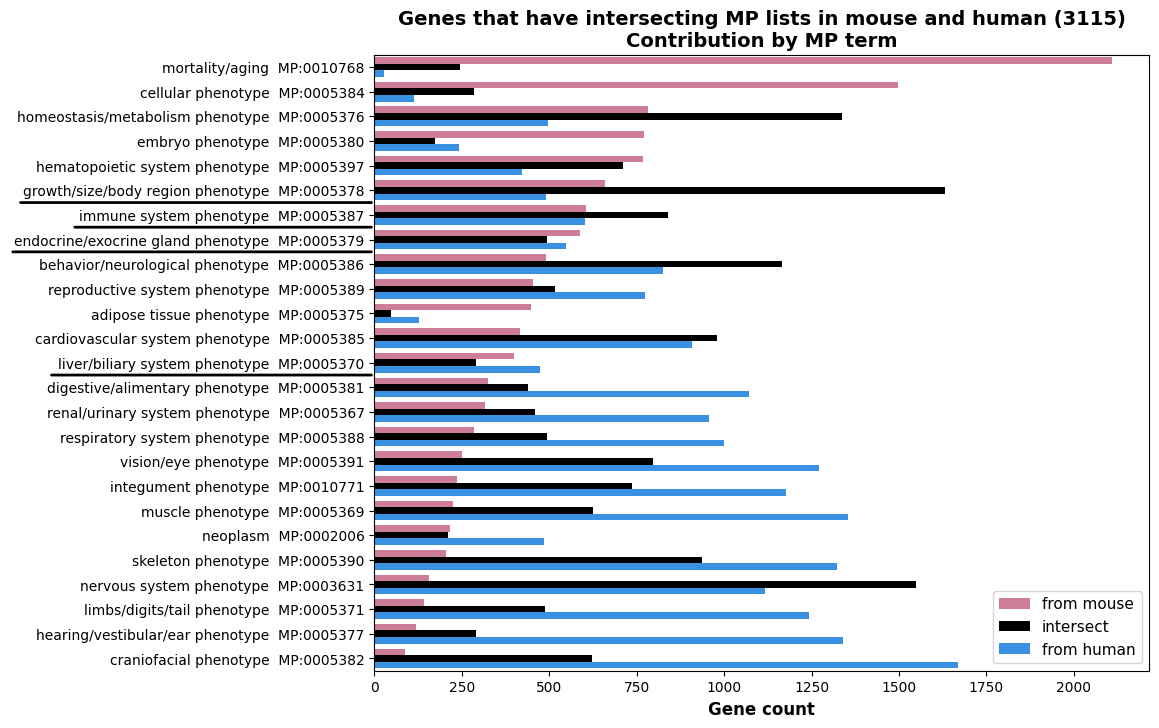

In [93]:
plt.figure(figsize=(10, 8))

sns.barplot(
    data=mp_count_intersect_df_source, 
    y="MP_term", 
    x="gene_count", 
    hue="intersection_val", 
    palette=["palevioletred", "k", "dodgerblue"]
)
plt.yticks(
    ticks=[i for i in range(25)], 
    labels=[
        f"{mpo.label(mp_count_intersect_df_source[:25].MP_term.tolist()[i])}  {mp_count_intersect_df_source[:25].MP_term.tolist()[i]}" 
        for i in range(25)
    ], 
    size=10
)
plt.xlabel("Gene count", weight="bold", size=12)
plt.ylabel("")
plt.legend(fontsize=11)

lines_coordinates = [
    ((0, 0.76), (-0.46, 0.76)),
    ((0, 0.72), (-0.39, 0.72)),
    ((0, 0.68), (-0.47, 0.68)),
    ((0, 0.48), (-0.42, 0.48))
]
for coordinates in lines_coordinates:
    plt.annotate(
        "", 
        xy=coordinates[0], 
        xycoords='axes fraction', 
        xytext=coordinates[1],
        arrowprops=dict(
            arrowstyle='-', color='black', linewidth=2
        )
    )
plt.title(
    "Genes that have intersecting MP lists in mouse and human (3115)\nContribution by MP term", 
    size=14, 
    weight='bold'
)
plt.savefig(
    f"{PLOTS_DIR}/concord_06_intersecting_genes_mp_source",
    bbox_inches="tight",
    dpi=800
)


In [94]:
# Check if all the calculations were correct
mp_count_intersect_df_source.groupby("MP_term").aggregate(
    {"gene_count": "sum"}
).reset_index()

g_b_both_contr_intersect_df["MPs_union"] = g_b_both_contr_intersect_df.apply(
    lambda x: x["MP_system_level_set"].union(x["MP_from_HP_system_level_set"]), axis=1
)

mp_count_union = dict()

for gene in g_b_both_contr_intersect_df.MPs_union.tolist():
    for mp in gene:
        if mp not in mp_count_union.keys():
            mp_count_union[mp] = 1
        else:
            mp_count_union[mp] += 1

mp_count_union_df = (
    pd.DataFrame.from_dict(mp_count_union, orient="index")
    .reset_index()
    .rename(columns={"index": "MP_term", 0: "gene_count"})
    .sort_values(by="gene_count", ascending=False)
)

mp_count_not_intersect_mouse_df.merge(
    mp_count_intersect_df_source.groupby("MP_term")
    .aggregate({"gene_count": "sum"})
    .reset_index(),
    on="MP_term",
)

/tmp/ipykernel_52830/1136979013.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_b_both_contr_intersect_df["MPs_union"] = g_b_both_contr_intersect_df.apply(


,MP_term,gene_count_x,intersection_val,gene_count_y
0,MP:0010768,2110,from mouse,2383
1,MP:0005384,1497,from mouse,1894
2,MP:0005376,783,from mouse,2618
3,MP:0005380,771,from mouse,1188
4,MP:0005397,768,from mouse,1901
5,MP:0005378,661,from mouse,2784
6,MP:0005387,605,from mouse,2046
7,MP:0005379,588,from mouse,1630
8,MP:0005386,491,from mouse,2482
9,MP:0005389,454,from mouse,1746


In [95]:
# Expression analysis.

print(f"gtex_data.columns: {gtex_data.columns}")
print(f"gtex_data.shape: {gtex_data.shape}")

gtex_data.head()

gtex_data.columns: Index(['Name', 'Description', 'Adipose - Subcutaneous',
       'Adipose - Visceral (Omentum)', 'Adrenal Gland', 'Artery - Aorta',
       'Artery - Coronary', 'Artery - Tibial', 'Bladder', 'Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra', 'Breast - Mammary Tissue',
       'Cells - Cultured fibroblasts', 'Cells - EBV-transformed lymphocytes',
       'Cervix - Ectocervix', 'Cervix - Endocervix', 'Colon - Sigmoid',
       'Colon - Transverse', 'Esophagus - Gastroesophageal Junction',
       'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Fallopian Tube',
       'Heart - Atrial Appe

,Name,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,ENSG00000223972.5,DDX11L1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.166403,0.00000,0.00000,0.00000,0.00000
1,ENSG00000227232.5,WASH7P,4.06403,3.37111,2.68549,4.04762,3.90076,3.63963,5.16375,1.43859,...,5.93298,6.13265,4.19378,5.92631,3.06248,4.702530,6.27255,7.19001,5.74554,2.64743
2,ENSG00000278267.1,MIR6859-1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.054223,0.00000,0.00000,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000


In [96]:
# adding new columns with median and average tissue expression

gtex_data["median_exp"] = gtex_data.iloc[:, 2:55].median(axis=1)
gtex_data["mean_exp"] = gtex_data.iloc[:, 2:55].mean(axis=1)

# add new columns with the number of tissues with expression > 10

gtex_data["count_exp"] = gtex_data.iloc[:, 2:55].apply(lambda x: (x > 10).sum(), axis=1)
gtex_data_cut = gtex_data[["Description", "median_exp", "mean_exp", "count_exp"]]

In [97]:
# Non-monosemantic

db_syst.head()

,gene_human,entrez_id_human,gene_mouse,MGI,MP_HMD,MP_PhenoGeno,HP_genes_to_phenotype,MP_system_level,HP_system_level,MP_from_HP_system_level
0,A1BG,1,A1bg,MGI:2152878,NaN,NaN,NaN,NaN,NaN,NaN
1,A1CF,29974,A1cf,MGI:1917115,"MP:0005378,MP:0005397,MP:0005376,MP:0005367,MP...","MP:0002083,MP:0003222,MP:0003061,MP:0004231,MP...",NaN,"MP:0005378,MP:0003631,MP:0005397,MP:0005376,MP...",NaN,NaN
2,A2M,2,A2m,MGI:2449119,NaN,NaN,NaN,NaN,NaN,NaN
3,A3GALT2,127550,A3galt2,MGI:2685279,NaN,NaN,NaN,NaN,NaN,NaN
4,A4GALT,53947,A4galt,MGI:3512453,"MP:0005386,MP:0010768,MP:0005376","MP:0009747,MP:0008874,MP:0009767","HP:0000006,HP:0010970","MP:0005386,MP:0010768,MP:0005376",HP:0001871,MP:0005397


In [98]:
# whole database with expression
db_syst_expr = db_syst.merge(
    gtex_data_cut, how="left", left_on="gene_human", right_on="Description"
)


duplicated = db_syst_expr[
    db_syst_expr.duplicated(subset=["gene_human", "gene_mouse"], keep=False)
]

for index, row in duplicated.iterrows():
    if (row["median_exp"] == 0) and (row["mean_exp"] == 0) and (row["count_exp"] == 0):
        db_syst_expr = db_syst_expr.drop(index)


duplicated = db_syst_expr[
    db_syst_expr.duplicated(subset=["gene_human", "gene_mouse"], keep=False)
]

for index, row in duplicated.iterrows():
    if row["count_exp"] == 0:
        db_syst_expr = db_syst_expr.drop(index)

db_syst_expr[db_syst_expr.duplicated(subset=["gene_human", "gene_mouse"], keep=False)]
db_syst_expr = db_syst_expr.drop(13338)

In [99]:
# Duplicated dropped
# Group formation (non-monosemantic)

group_a_humn_1 = db_syst_expr[
    db_syst_expr.MP_system_level.isna()
    & (db_syst_expr.MP_from_HP_system_level.isna() == False)
]
group_a_mouse_1 = db_syst_expr[
    (db_syst_expr.MP_system_level.isna() == False)
    & db_syst_expr.MP_from_HP_system_level.isna()
]
group_b_both_1 = db_syst_expr[
    (db_syst_expr.MP_system_level.isna() == False)
    & (db_syst_expr.MP_from_HP_system_level.isna() == False)
]
group_c_neither_1 = db_syst_expr[
    (db_syst_expr.MP_system_level.isna() == True)
    & (db_syst_expr.MP_from_HP_system_level.isna() == True)
]
group_b_botn_equal_1 = group_b_both_1[
    group_b_both_1.MP_system_level.apply(lambda x: sorted(x.split(",")))
    == group_b_both_1.MP_from_HP_system_level.apply(lambda x: sorted(x.split(",")))
]
group_b_botn_different_1 = group_b_both_1[
    group_b_both_1.MP_system_level.apply(lambda x: sorted(x.split(",")))
    != group_b_both_1.MP_from_HP_system_level.apply(lambda x: sorted(x.split(",")))
]

group_a_humn_1["group"] = "human only"
group_a_mouse_1["group"] = "mouse only"
group_b_botn_equal_1["group"] = "both & equal"
group_b_botn_different_1["group"] = "both & different"
group_c_neither_1["group"] = "neither"

db_syst_expr_groups = pd.concat(
    [
        group_a_humn_1,
        group_a_mouse_1,
        group_b_botn_equal_1,
        group_b_botn_different_1,
        group_c_neither_1,
    ],
    axis=0,
)

print(f"""
{group_a_humn_1.shape[0]}
{group_a_mouse_1.shape[0]}
{group_b_both_1.shape[0]}
{group_c_neither_1.shape[0]}
{group_b_botn_equal_1.shape[0]}
{group_b_botn_different_1.shape[0]}
"""
)


854
9525
4462
14845
21
4441



/tmp/ipykernel_52830/4157191605.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a_humn_1["group"] = "human only"
/tmp/ipykernel_52830/4157191605.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a_mouse_1["group"] = "mouse only"
/tmp/ipykernel_52830/4157191605.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

''

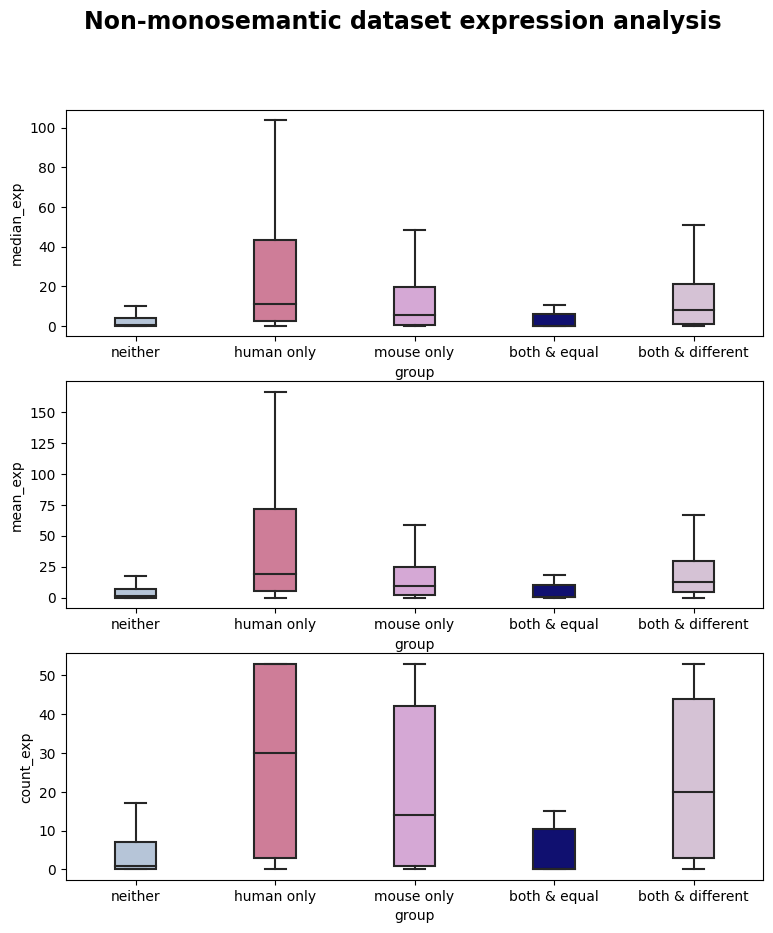

In [100]:
plt.figure(figsize=(9, 10))

plt.subplot(3, 1, 1)
sns.boxplot(
    data=db_syst_expr_groups,
    x="group",
    y="median_exp",
    width=0.3,
    showfliers=False,
    order=["neither", "human only", "mouse only", "both & equal", "both & different"],
    palette=sns.color_palette(
        ["lightsteelblue", "palevioletred", "plum", "navy", "thistle"]
    ),
)


plt.subplot(3, 1, 2)
sns.boxplot(
    data=db_syst_expr_groups,
    x="group",
    y="mean_exp",
    width=0.3,
    showfliers=False,
    order=["neither", "human only", "mouse only", "both & equal", "both & different"],
    palette=sns.color_palette(
        ["lightsteelblue", "palevioletred", "plum", "navy", "thistle"]
    ),
)


plt.subplot(3, 1, 3)
sns.boxplot(
    data=db_syst_expr_groups,
    x="group",
    y="count_exp",
    width=0.3,
    showfliers=False,
    order=["neither", "human only", "mouse only", "both & equal", "both & different"],
    palette=sns.color_palette(
        ["lightsteelblue", "palevioletred", "plum", "navy", "thistle"]
    ),
)

plt.suptitle("Non-monosemantic dataset expression analysis", weight="bold", size=17)

#plt.savefig(f"{PLOTS_DIR}/Non_monosemantic_expression", bbox_inches="tight", dpi=800)
("")


In [105]:
# Monosemantic
gene_count_human = (
    pd.DataFrame(db_syst_expr_groups.entrez_id_human.value_counts())
    .reset_index()
    .rename(columns={"count": "count_human"})
)

gene_count_mouse = (
    pd.DataFrame(db_syst_expr_groups.MGI.value_counts())
    .reset_index()
    .rename(columns={"count": "count_mouse"})
)

db_syst_gene_count = db_syst_expr_groups.merge(
    gene_count_human, on="entrez_id_human", how="left"
).merge(gene_count_mouse, on="MGI", how="left")

db_syst_expr_groups_monosemantic = db_syst_gene_count[
    (db_syst_gene_count.count_human == 1) & (db_syst_gene_count.count_mouse == 1)
]

print(f"db_syst_expr_groups_monosemantic shape: {db_syst_expr_groups_monosemantic.shape[0]}")

db_syst_expr_groups_monosemantic shape: 16985


''

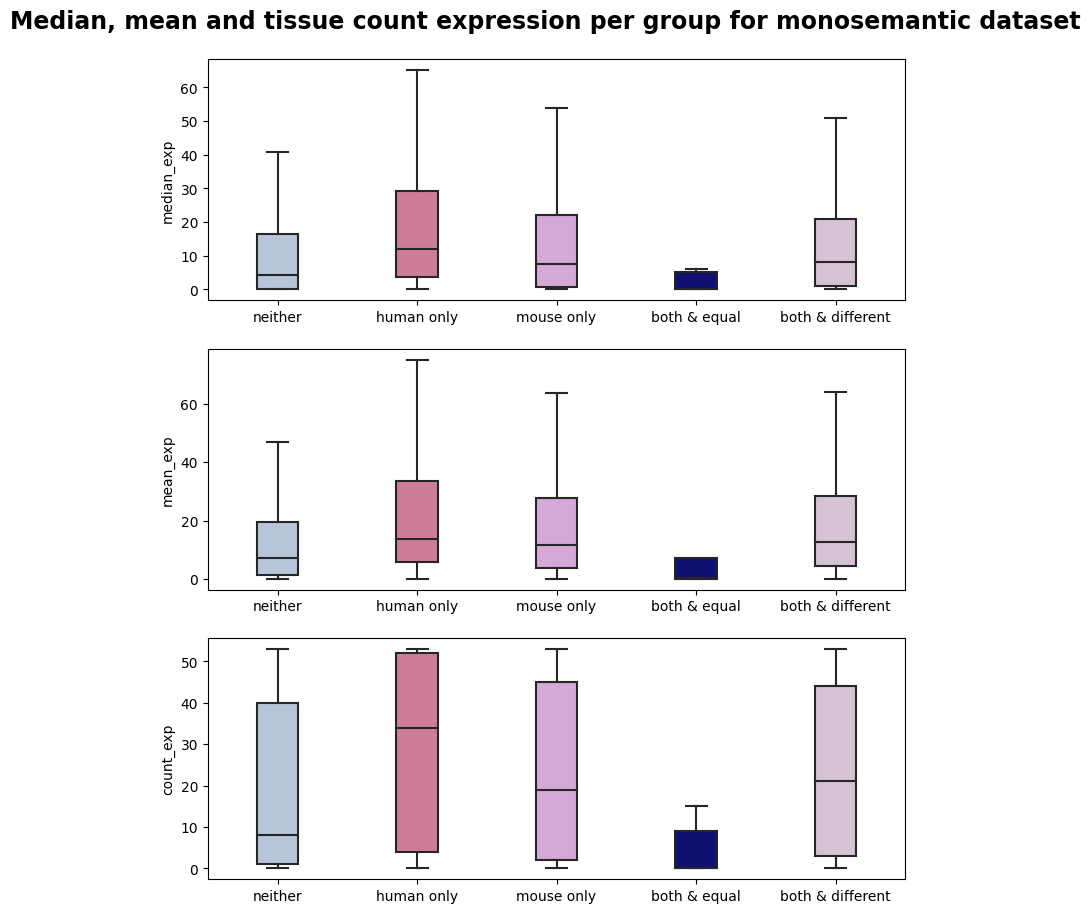

In [106]:
plt.figure(figsize=(9, 10))

plt.subplot(3, 1, 1)
sns.boxplot(
    data=db_syst_expr_groups_monosemantic,
    x="group",
    y="median_exp",
    width=0.3,
    showfliers=False,
    order=["neither", "human only", "mouse only", "both & equal", "both & different"],
    palette=sns.color_palette(
        ["lightsteelblue", "palevioletred", "plum", "navy", "thistle"]
    ),
)
plt.xlabel(None)


plt.subplot(3, 1, 2)
sns.boxplot(
    data=db_syst_expr_groups_monosemantic,
    x="group",
    y="mean_exp",
    width=0.3,
    showfliers=False,
    order=["neither", "human only", "mouse only", "both & equal", "both & different"],
    palette=sns.color_palette(
        ["lightsteelblue", "palevioletred", "plum", "navy", "thistle"]
    ),
)
plt.xlabel(None)


plt.subplot(3, 1, 3)
sns.boxplot(
    data=db_syst_expr_groups_monosemantic,
    x="group",
    y="count_exp",
    width=0.3,
    showfliers=False,
    order=["neither", "human only", "mouse only", "both & equal", "both & different"],
    palette=sns.color_palette(
        ["lightsteelblue", "palevioletred", "plum", "navy", "thistle"]
    ),
)
plt.xlabel(None)

plt.suptitle(
    "Median, mean and tissue count expression per group for monosemantic dataset",
    weight="bold",
    size=17
)
plt.subplots_adjust(top=0.93)
plt.savefig(f"{PLOTS_DIR}/concord_07_monosemantic_expression", bbox_inches="tight", dpi=800)
("")

In [107]:
# will be useful in the future for contraint analysis both & equal VS others
constr = db_syst_expr_groups_monosemantic.merge(
    gnomad_data, 
    how="left", 
    left_on="gene_human", 
    right_on="gene"
)

In [108]:
# Monosemantic + differential by contribution
print(f"Unique mono groups: {db_syst_expr_groups_monosemantic.group.unique()}")
print(f"db_syst_expr_groups_monosemantic.shape: {db_syst_expr_groups_monosemantic.shape}")

# df with group to split
db_syst_expr_groups_monosemantic_both_different = db_syst_expr_groups_monosemantic[
    db_syst_expr_groups_monosemantic.group == "both & different"
]


# for assertion
assertion = db_syst_expr_groups_monosemantic.shape[0] - db_syst_expr_groups_monosemantic_both_different.shape[0]
print(f"Diff: {assertion}")

Unique mono groups: ['human only' 'mouse only' 'both & equal' 'both & different' 'neither']
db_syst_expr_groups_monosemantic.shape: (16985, 17)
Diff: 12816


In [109]:
db_syst_expr_groups_monosemantic.drop(
    db_syst_expr_groups_monosemantic[
        db_syst_expr_groups_monosemantic["group"] == "both & different"
    ].index,
    inplace=True,
)

print(f"db_syst_expr_groups_monosemantic shape: {db_syst_expr_groups_monosemantic.shape}")

db_syst_expr_groups_monosemantic shape: (12816, 17)


/tmp/ipykernel_52830/2196532195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_syst_expr_groups_monosemantic.drop(


In [110]:
db_syst_expr_groups_monosemantic_both_different[
    "MP_system_level_set"
] = db_syst_expr_groups_monosemantic_both_different.MP_system_level.apply(
    lambda x: set(x.split(","))
)
db_syst_expr_groups_monosemantic_both_different[
    "MP_from_HP_system_level_set"
] = db_syst_expr_groups_monosemantic_both_different.MP_from_HP_system_level.apply(
    lambda x: set(x.split(","))
)

/tmp/ipykernel_52830/1959835976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_syst_expr_groups_monosemantic_both_different[
/tmp/ipykernel_52830/1959835976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_syst_expr_groups_monosemantic_both_different[


In [111]:
# grouping by contribution
db_syst_expr_groups_monosemantic_both_different["group"] = "both contribute"

db_s_e_g_mono_diff_hum = db_syst_expr_groups_monosemantic_both_different[
    db_syst_expr_groups_monosemantic_both_different.apply(
        lambda x: x["MP_system_level_set"].issubset(x["MP_from_HP_system_level_set"]),
        axis=1,
    )
]
db_s_e_g_mono_diff_hum["group"] = "more from human"

db_s_e_g_mono_diff_mouse = db_syst_expr_groups_monosemantic_both_different[
    db_syst_expr_groups_monosemantic_both_different.apply(
        lambda x: x["MP_system_level_set"].issuperset(x["MP_from_HP_system_level_set"]),
        axis=1,
    )
]
db_s_e_g_mono_diff_mouse["group"] = "more from mouse"

db_s_e_g_mono_diff_both_non_inter = db_syst_expr_groups_monosemantic_both_different[
    db_syst_expr_groups_monosemantic_both_different.apply(
        lambda x: x["MP_system_level_set"].intersection(
            x["MP_from_HP_system_level_set"]
        ),
        axis=1,
    )
    == set()
]
db_s_e_g_mono_diff_both_non_inter["group"] = "both contribute,\nnot intersecting"

db_s_e_g_mono_diff_both_inter = db_syst_expr_groups_monosemantic_both_different[
    (
        db_syst_expr_groups_monosemantic_both_different.apply(
            lambda x: x["MP_system_level_set"].issuperset(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        == False
    )
    & (
        db_syst_expr_groups_monosemantic_both_different.apply(
            lambda x: x["MP_system_level_set"].issubset(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        == False
    )
    & (
        db_syst_expr_groups_monosemantic_both_different.apply(
            lambda x: x["MP_system_level_set"].intersection(
                x["MP_from_HP_system_level_set"]
            ),
            axis=1,
        )
        != set()
    )
]
db_s_e_g_mono_diff_both_inter["group"] = "both contribute,\nintersecting"

# db_s_e_g_mono_diff_both_contr = db_syst_expr_groups_monosemantic_both_different[(db_syst_expr_groups_monosemantic_both_different.apply(lambda x: x['MP_system_level_set'].issuperset(x['MP_from_HP_system_level_set']), axis=1) == False) & (db_syst_expr_groups_monosemantic_both_different.apply(lambda x: x['MP_system_level_set'].issubset(x['MP_from_HP_system_level_set']), axis=1) == False)]
# db_s_e_g_mono_diff_both_contr['group'] = "both contribute"

db_s_e_g_mono_contr = pd.concat(
    [
        db_s_e_g_mono_diff_hum,
        db_s_e_g_mono_diff_mouse,
        db_s_e_g_mono_diff_both_non_inter,
        db_s_e_g_mono_diff_both_inter,
        db_syst_expr_groups_monosemantic,
    ],
    axis=0,
)

print(f"Unique db_s_e_g_mono_contr: {db_s_e_g_mono_contr.group.unique()}")
db_s_e_g_mono_contr.head()

/tmp/ipykernel_52830/2715306566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_syst_expr_groups_monosemantic_both_different["group"] = "both contribute"
/tmp/ipykernel_52830/2715306566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_s_e_g_mono_diff_hum["group"] = "more from human"
/tmp/ipykernel_52830/2715306566.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Unique db_s_e_g_mono_contr: ['more from human' 'more from mouse' 'both contribute,\nnot intersecting'
 'both contribute,\nintersecting' 'human only' 'mouse only' 'both & equal'
 'neither']


/tmp/ipykernel_52830/2715306566.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_s_e_g_mono_diff_both_inter["group"] = "both contribute,\nintersecting"


,gene_human,entrez_id_human,gene_mouse,MGI,MP_HMD,MP_PhenoGeno,HP_genes_to_phenotype,MP_system_level,HP_system_level,MP_from_HP_system_level,Description,median_exp,mean_exp,count_exp,group,count_human,count_mouse,MP_system_level_set,MP_from_HP_system_level_set
10404,AASS,10157,Aass,MGI:1353573,"MP:0005367,MP:0005390,MP:0005378,MP:0005387","MP:0000157,MP:0000702,MP:0011874","HP:0003297,HP:0012758,HP:0002161,HP:0001268,HP...","MP:0005367,MP:0005390,MP:0005378,MP:0005387","HP:0000478,HP:0002086,HP:0000924,HP:0000079,HP...","MP:0005390,MP:0005378,MP:0005397,MP:0003631,MP...",AASS,11.79620,19.356348,32.0,more from human,1,1,"{MP:0005390, MP:0005387, MP:0005378, MP:0005367}","{MP:0010771, MP:0005367, MP:0005386, MP:000537..."
10405,ABAT,18,Abat,MGI:2443582,MP:0010768,MP:0011100,"HP:0000098,HP:0000494,HP:0001321,HP:0001250,HP...",MP:0010768,"HP:0003011,HP:0001507,HP:0040006,HP:0000924,HP...","MP:0005390,MP:0005378,MP:0003631,MP:0005386,MP...",ABAT,7.35489,26.512794,22.0,more from human,1,1,{MP:0010768},"{MP:0005386, MP:0005382, MP:0005378, MP:000539..."
10421,ABCC6,368,Abcc6,MGI:1351634,"MP:0005378,MP:0005376,MP:0005367,MP:0005391,MP...","MP:0003197,MP:0000530,MP:0005553,MP:0002838,MP...","HP:0000410,HP:0001102,HP:0010639,HP:0006690,HP...","MP:0005378,MP:0005382,MP:0005391,MP:0005367,MP...","HP:0040064,HP:0000464,HP:0000478,HP:0002086,HP...","MP:0005378,MP:0005391,MP:0005371,MP:0005380,MP...",ABCC6,0.58057,1.952479,1.0,more from human,1,1,"{MP:0010771, MP:0005376, MP:0005382, MP:000537...","{MP:0005386, MP:0005391, MP:0005375, MP:000538..."
10422,ABCC8,6833,Abcc8,MGI:1352629,"MP:0005378,MP:0005379,MP:0005376","MP:0005560,MP:0005217,MP:0000189,MP:0005293,MP...","HP:0031223,HP:0002591,HP:0040299,HP:0000980,HP...","MP:0005378,MP:0005379,MP:0005376,MP:0005385","HP:0040064,HP:0000478,HP:0100790,HP:0001732,HP...","MP:0005378,MP:0005391,MP:0005371,MP:0005397,MP...",ABCC8,1.55840,9.691527,9.0,more from human,1,1,"{MP:0005378, MP:0005379, MP:0005376, MP:0005385}","{MP:0005386, MP:0005391, MP:0005379, MP:000539..."
10426,ABCD4,5826,Abcd4,MGI:1349217,MP:0005386,"MP:0001413,MP:0005316","HP:0002160,HP:0001510,HP:0001873,HP:0002789,HP...",MP:0005386,"HP:0000478,HP:0100790,HP:0002086,HP:0000924,HP...","MP:0005390,MP:0005378,MP:0005397,MP:0003631,MP...",ABCD4,23.51670,25.510347,50.0,more from human,1,1,{MP:0005386},"{MP:0010771, MP:0005367, MP:0005376, MP:000538..."


In [112]:
groups = [
    "neither",
    "human only",
    "mouse only",
    "more from human",
    "more from mouse",
    "both contribute,\nnot intersecting",
    "both contribute,\nintersecting",
    "both & equal",
]
palette_groups = sns.color_palette(
    [
        "lightsteelblue",
        "palevioletred",
        "plum",
        "pink",
        "lavender",
        "thistle",
        "lightblue",
        "navy",
    ]
)

''

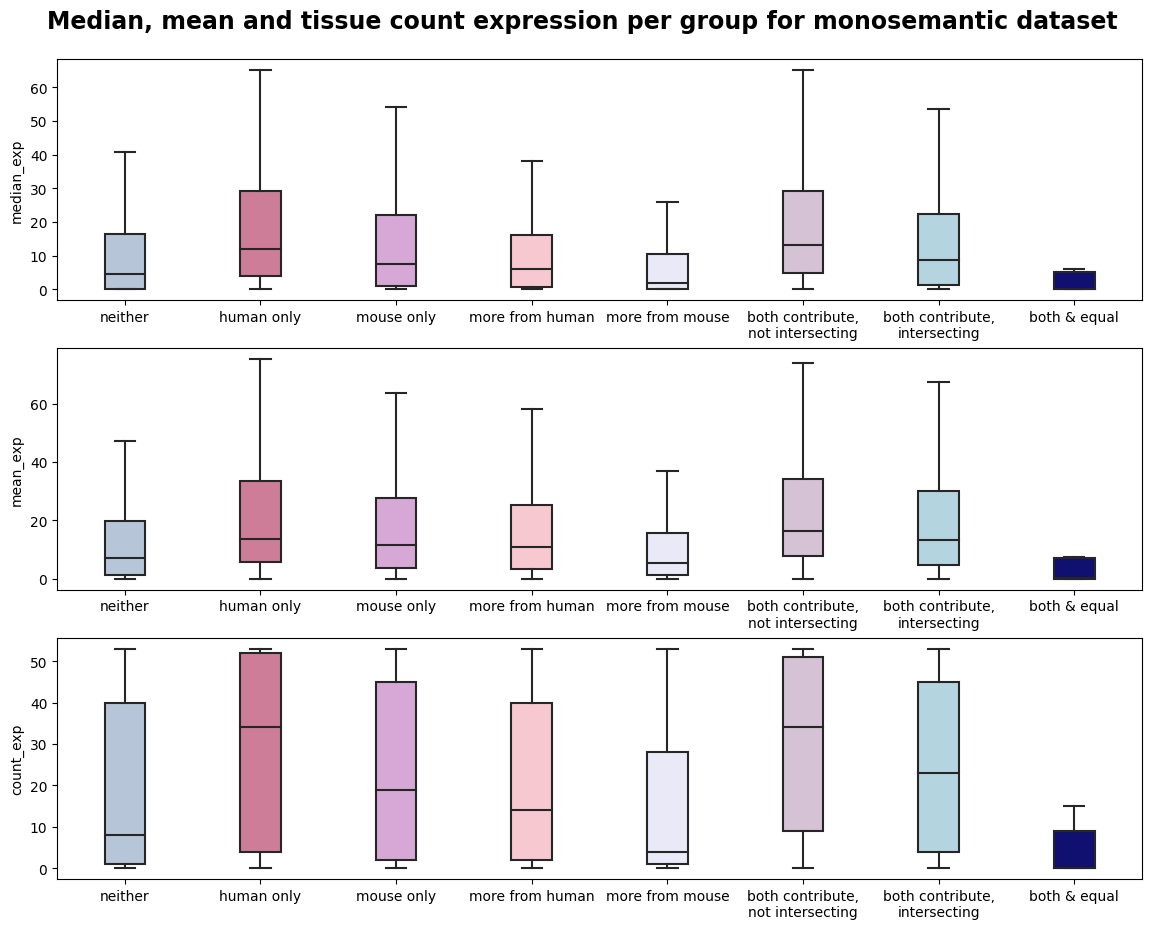

In [113]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.boxplot(
    data=db_s_e_g_mono_contr,
    x="group",
    y="median_exp",
    width=0.3,
    showfliers=False,
    order=groups,
    palette=palette_groups,
)


plt.subplot(3, 1, 2)
sns.boxplot(
    data=db_s_e_g_mono_contr,
    x="group",
    y="mean_exp",
    width=0.3,
    showfliers=False,
    order=groups,
    palette=palette_groups,
)


plt.subplot(3, 1, 3)
sns.boxplot(
    data=db_s_e_g_mono_contr,
    x="group",
    y="count_exp",
    width=0.3,
    showfliers=False,
    order=groups,
    palette=palette_groups,
)
plt.xlabel(None)

plt.suptitle(
    "Median, mean and tissue count expression per group for monosemantic dataset",
    weight="bold",
    size=17
)
plt.subplots_adjust(top=0.93)

plt.savefig(f"{PLOTS_DIR}/concord_08_monosemantic_expression_detailed", bbox_inches="tight", dpi=800)
("")

In [114]:
# Constraint analysis

gnomad_data.head()

,gene,transcript,obs_mis,exp_mis,oe_mis,mu_mis,possible_mis,obs_mis_pphen,exp_mis_pphen,oe_mis_pphen,...,gene_type,gene_length,exac_pLI,exac_obs_lof,exac_exp_lof,exac_oe_lof,brain_expression,chromosome,start_position,end_position
0,MED13,ENST00000397786,871,1117.80,0.77921,0.000056,14195,314.0,529.75,0.59273,...,protein_coding,122678,1.0,0.0,64.393,0.000000,NaN,17,60019966,60142643
1,NIPBL,ENST00000282516,846,1441.50,0.58688,0.000074,18540,158.0,543.10,0.29092,...,protein_coding,189655,1.0,1.0,110.570,0.009044,NaN,5,36876861,37066515
2,SMC3,ENST00000361804,178,630.07,0.28251,0.000032,8109,21.0,182.52,0.11506,...,protein_coding,36946,1.0,0.0,58.523,0.000000,NaN,10,112327449,112364394
3,CNOT1,ENST00000317147,561,1295.90,0.43290,0.000069,15670,51.0,290.68,0.17545,...,protein_coding,109936,1.0,3.0,90.130,0.033285,NaN,16,58553855,58663790
4,RLF,ENST00000372771,669,972.87,0.68766,0.000047,12682,107.0,321.14,0.33319,...,protein_coding,79549,1.0,0.0,43.607,0.000000,NaN,1,40627045,40706593


In [115]:
gnomad_data = gnomad_data[["gene", "oe_lof_upper", "pLI", "mis_z"]]

# db_s_e_m_c - database system expression monosemantic contraint
db_s_e_m_c = db_s_e_g_mono_contr.merge(
    gnomad_data, how="left", left_on="gene_human", right_on="gene"
)
db_s_e_m_c.head()

,gene_human,entrez_id_human,gene_mouse,MGI,MP_HMD,MP_PhenoGeno,HP_genes_to_phenotype,MP_system_level,HP_system_level,MP_from_HP_system_level,...,count_exp,group,count_human,count_mouse,MP_system_level_set,MP_from_HP_system_level_set,gene,oe_lof_upper,pLI,mis_z
0,AASS,10157,Aass,MGI:1353573,"MP:0005367,MP:0005390,MP:0005378,MP:0005387","MP:0000157,MP:0000702,MP:0011874","HP:0003297,HP:0012758,HP:0002161,HP:0001268,HP...","MP:0005367,MP:0005390,MP:0005378,MP:0005387","HP:0000478,HP:0002086,HP:0000924,HP:0000079,HP...","MP:0005390,MP:0005378,MP:0005397,MP:0003631,MP...",...,32.0,more from human,1,1,"{MP:0005390, MP:0005387, MP:0005378, MP:0005367}","{MP:0010771, MP:0005367, MP:0005386, MP:000537...",AASS,0.809,2.310100e-12,0.88222
1,ABAT,18,Abat,MGI:2443582,MP:0010768,MP:0011100,"HP:0000098,HP:0000494,HP:0001321,HP:0001250,HP...",MP:0010768,"HP:0003011,HP:0001507,HP:0040006,HP:0000924,HP...","MP:0005390,MP:0005378,MP:0003631,MP:0005386,MP...",...,22.0,more from human,1,1,{MP:0010768},"{MP:0005386, MP:0005382, MP:0005378, MP:000539...",ABAT,0.567,6.321600e-03,0.57296
2,ABCC6,368,Abcc6,MGI:1351634,"MP:0005378,MP:0005376,MP:0005367,MP:0005391,MP...","MP:0003197,MP:0000530,MP:0005553,MP:0002838,MP...","HP:0000410,HP:0001102,HP:0010639,HP:0006690,HP...","MP:0005378,MP:0005382,MP:0005391,MP:0005367,MP...","HP:0040064,HP:0000464,HP:0000478,HP:0002086,HP...","MP:0005378,MP:0005391,MP:0005371,MP:0005380,MP...",...,1.0,more from human,1,1,"{MP:0010771, MP:0005376, MP:0005382, MP:000537...","{MP:0005386, MP:0005391, MP:0005375, MP:000538...",ABCC6,1.026,5.616700e-35,-1.08780
3,ABCC8,6833,Abcc8,MGI:1352629,"MP:0005378,MP:0005379,MP:0005376","MP:0005560,MP:0005217,MP:0000189,MP:0005293,MP...","HP:0031223,HP:0002591,HP:0040299,HP:0000980,HP...","MP:0005378,MP:0005379,MP:0005376,MP:0005385","HP:0040064,HP:0000478,HP:0100790,HP:0001732,HP...","MP:0005378,MP:0005391,MP:0005371,MP:0005397,MP...",...,9.0,more from human,1,1,"{MP:0005378, MP:0005379, MP:0005376, MP:0005385}","{MP:0005386, MP:0005391, MP:0005379, MP:000539...",ABCC8,0.765,7.957100e-24,1.91400
4,ABCD4,5826,Abcd4,MGI:1349217,MP:0005386,"MP:0001413,MP:0005316","HP:0002160,HP:0001510,HP:0001873,HP:0002789,HP...",MP:0005386,"HP:0000478,HP:0100790,HP:0002086,HP:0000924,HP...","MP:0005390,MP:0005378,MP:0005397,MP:0003631,MP...",...,50.0,more from human,1,1,{MP:0005386},"{MP:0010771, MP:0005367, MP:0005376, MP:000538...",ABCD4,0.898,1.336400e-12,0.16930


''

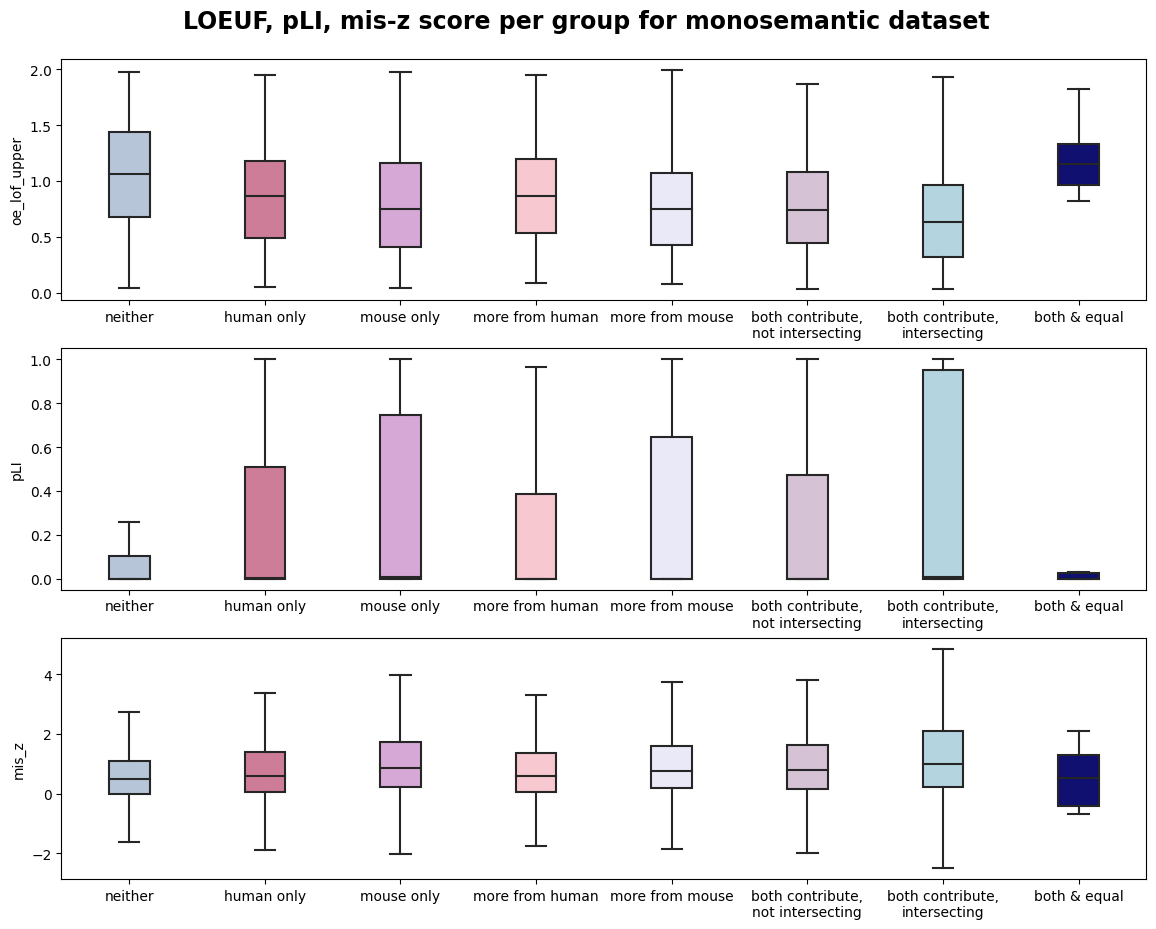

In [116]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.boxplot(
    data=db_s_e_m_c,
    x="group",
    y="oe_lof_upper",
    width=0.3,
    showfliers=False,
    order=groups,
    palette=palette_groups,
)


plt.subplot(3, 1, 2)
sns.boxplot(
    data=db_s_e_m_c,
    x="group",
    y="pLI",
    width=0.3,
    showfliers=False,
    order=groups,
    palette=palette_groups,
)


plt.subplot(3, 1, 3)
sns.boxplot(
    data=db_s_e_m_c,
    x="group",
    y="mis_z",
    width=0.3,
    showfliers=False,
    order=groups,
    palette=palette_groups,
)
plt.xlabel(None)

plt.suptitle(
    "LOEUF, pLI, mis-z score per group for monosemantic dataset",
    weight="bold",
    size=17
)
plt.subplots_adjust(top=0.93)

plt.savefig(f"{PLOTS_DIR}/concord_09_monosemantic_constraint", bbox_inches="tight", dpi=800)
("")

In [117]:
print(f"Constr group unique: {constr.group.unique()}")

Constr group unique: ['human only' 'mouse only' 'both & equal' 'both & different' 'neither']


''

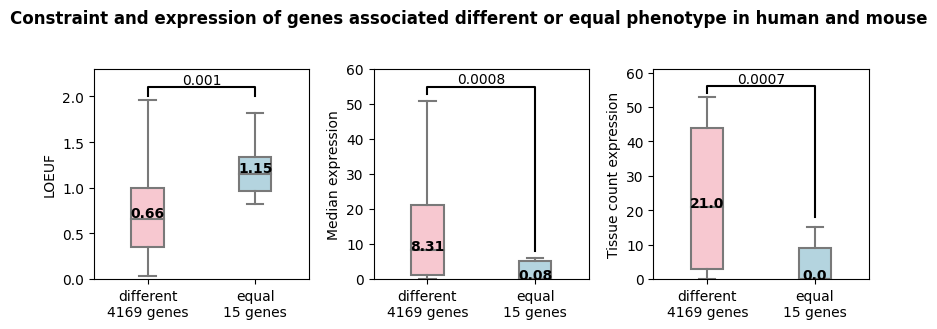

In [118]:
# both & equal VS both & different

groups = ['both & different', 'both & equal']
palette_groups = ['pink', 'lightblue']
labels=['different\n4169 genes', 'equal\n15 genes']

plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
sns.boxplot(
    data=constr, 
    x="group", 
    y="oe_lof_upper", 
    width=0.3, 
    showfliers=False,
    order=groups,
    palette=palette_groups
)
plt.xticks(ticks=[0, 1], labels=labels)
plt.plot([0, 0, 1, 1], [2, 2.1, 2.1, 2], lw=1.5, c='k')
plt.text((0 + 1)*.5, 2.1, "0.001", ha='center', va='bottom', color='k')
plt.ylim([0, 2.3])
plt.xlabel(None)
plt.ylabel("LOEUF")
medians = [
    round(constr[constr.group == "both & different"]["oe_lof_upper"].median(), 2),
    round(constr[constr.group == "both & equal"]["oe_lof_upper"].median(), 2)
]
for i in range(2):
    plt.text(
        i, 
        medians[i] + 0.02, 
        str(medians[i]),
        horizontalalignment='center', 
        weight='semibold',
        size=10
    )

plt.subplot(2, 3, 2)
sns.boxplot(
    data=constr, 
    x="group", 
    y="median_exp", 
    width=0.3, 
    showfliers=False,
    order=groups,
    palette=palette_groups
)
plt.xticks(ticks=[0, 1], labels=labels)
plt.plot([0, 0, 1, 1], [53, 55, 55, 8], lw=1.5, c='k')
plt.text((0 + 1)*.5, 55, "0.0008", ha='center', va='bottom', color='k')
plt.xlabel(None)
plt.ylim([0, 60])
plt.ylabel("Median expression")
medians = [
    round(constr[constr.group == "both & different"]["median_exp"].median(), 2),
    round(constr[constr.group == "both & equal"]["median_exp"].median(), 2)
]
for i in range(2):
    plt.text(
        i, 
        medians[i] + 0.02, 
        str(medians[i]),
        horizontalalignment='center', 
        weight='semibold',
        size=10
)

plt.subplot(2, 3, 3)
sns.boxplot(
    data=constr, 
    x="group", 
    y="count_exp", 
    width=0.3, 
    showfliers=False,
    order=groups,
    palette=palette_groups
)
plt.xticks(ticks=[0, 1], labels=labels)
plt.plot([0, 0, 1, 1], [54, 56, 56, 18], lw=1.5, c='k')
plt.text((0 + 1)*.5, 56, "0.0007", ha='center', va='bottom', color='k')
plt.xlabel(None)
plt.ylim([0, 61])
plt.ylabel("Tissue count expression")
medians = [
    round(constr[constr.group == "both & different"]["count_exp"].median(), 2),
    round(constr[constr.group == "both & equal"]["count_exp"].median(), 2)
]
for i in range(2):
    plt.text(
        i, 
        medians[i] + 0.02, 
        str(medians[i]),
        horizontalalignment='center', 
        weight='semibold',
        size=10
)

plt.subplots_adjust(wspace=0.3)
plt.suptitle(
    f"Constraint and expression of genes associated different or equal phenotype in human and mouse", 
    weight="bold", 
    size=12
)

plt.savefig(
    f"{PLOTS_DIR}/concord_10_equal_different_constraint_expression", 
    bbox_inches="tight", 
    dpi=800, 
)
("")

In [119]:
# Jaccard index for system-level MPO terms
# Which MP terms are mostly represented in both organisms?
constr[(constr.group == "both & different") | (constr.group == "both & equal")]\
    .to_csv("../intermediate_data/constraint_all.csv")

gene_mouse_human = [
    db_s_e_g_mono_contr.gene_human.tolist(),
    db_s_e_g_mono_contr.MP_system_level.tolist(),
    db_s_e_g_mono_contr.MP_from_HP_system_level.tolist(),
]

print(len(gene_mouse_human[0]))

mouse_mps_dict = {}
human_mps_dict = {}

for unit_idx in range(16985):
    gene = gene_mouse_human[0][unit_idx]
    mouse_mps = gene_mouse_human[1][unit_idx]
    human_mps = gene_mouse_human[2][unit_idx]

    for mouse_mp in str(mouse_mps).split(","):
        if mouse_mp not in mouse_mps_dict.keys():
            mouse_mps_dict[mouse_mp] = list([gene])
        else:
            mouse_mps_dict[mouse_mp].append(gene)

    for human_mp in str(human_mps).split(","):
        if human_mp not in human_mps_dict.keys():
            human_mps_dict[human_mp] = list([gene])
        else:
            human_mps_dict[human_mp].append(gene)

        
summary = list([[]])

for k in mouse_mps_dict.keys():
    # print(k, mpo.label(k), len(set(mouse_mps_dict[k])), len(set(human_mps_dict[k])))
    summary.append(
        [k, mpo.label(k), len(set(mouse_mps_dict[k])), len(set(human_mps_dict[k]))]
    )

gene_count_by_mp = pd.DataFrame(summary).rename(
    columns={
        0: "MP_system_term",
        1: "MP_term_label",
        2: "mouse_gene_count",
        3: "human_gene_count",
    }
)[1:]

gene_count_by_mp

16985


,MP_system_term,MP_term_label,mouse_gene_count,human_gene_count
1,MP:0005367,renal/urinary system phenotype,1804.0,1842.0
2,MP:0005390,skeleton phenotype,2806.0,2971.0
3,MP:0005378,growth/size/body region phenotype,5961.0,2769.0
4,MP:0005387,immune system phenotype,4416.0,1844.0
5,MP:0010768,mortality/aging,6258.0,400.0
6,MP:0005382,craniofacial phenotype,1435.0,3027.0
7,MP:0005391,vision/eye phenotype,2711.0,2826.0
8,MP:0010771,integument phenotype,2378.0,2478.0
9,MP:0005385,cardiovascular system phenotype,3606.0,2465.0
10,MP:0005376,homeostasis/metabolism phenotype,6372.0,2469.0


In [139]:
gene_count_hum = gene_count_by_mp.drop('mouse_gene_count', axis=1).rename(columns={'human_gene_count': 'gene_count'})
gene_count_hum['organism'] = 'human'
gene_count_mous = gene_count_by_mp.drop('human_gene_count', axis=1).rename(columns={'mouse_gene_count': 'gene_count'})
gene_count_mous['organism'] = 'mouse'

gene_count_all = pd.concat([gene_count_mous, gene_count_hum])

''

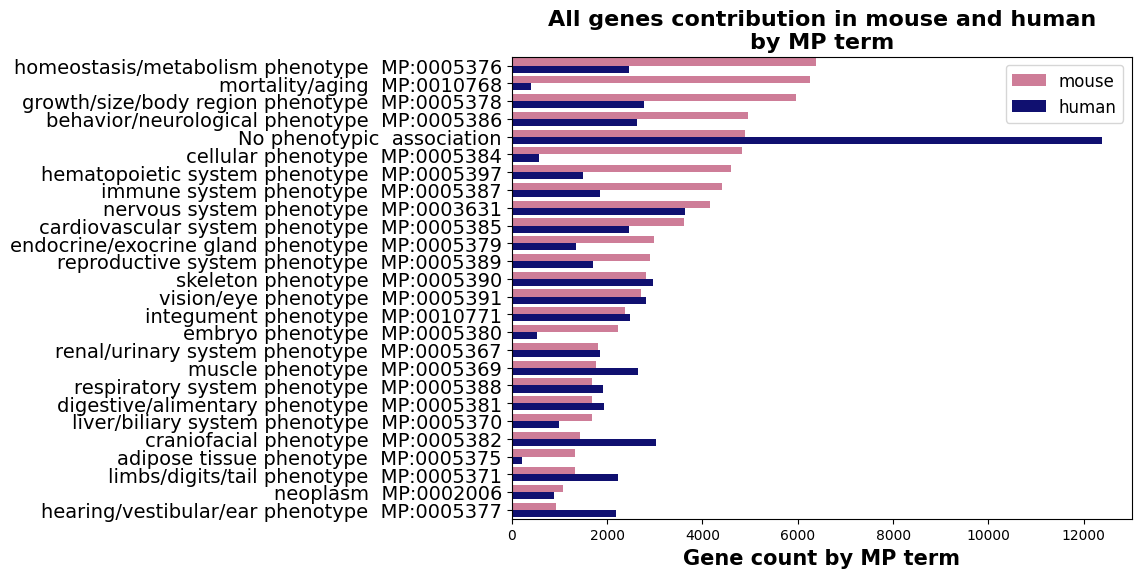

In [142]:
plt.figure(figsize=(8, 6))

gene_count_all_sort_m = pd.concat([
    gene_count_mous.sort_values(by="gene_count", ascending=False), 
    gene_count_hum
])

mps_for_plot = gene_count_all_sort_m.MP_system_term.tolist()

labels = [f"{mpo.label(mps_for_plot[i]) if mps_for_plot[i] != 'nan' else 'No phenotypic'}  {mps_for_plot[i] if mps_for_plot[i] != 'nan' else 'association'}" for i in range(26)] 

sns.barplot(
    data=gene_count_all_sort_m, 
    y="MP_system_term", 
    x="gene_count", 
    hue="organism", 
    palette=["palevioletred", "navy"]
)
plt.yticks(
    ticks=[i for i in range(26)], 
    labels=labels,
    size=14
)
plt.xlabel("Gene count by MP term", weight="bold", size=15)
plt.ylabel("")
plt.legend(fontsize=12)
plt.title(
    "All genes contribution in mouse and human\nby MP term", 
    weight='bold', 
    size=16
)

plt.savefig(
    f"{PLOTS_DIR}/concord_01_all_mps_source", 
    bbox_inches="tight", 
    dpi=800, 
)
("")

In [143]:
# Dicts with MP term count for human and mouse for heatmap labeling
mouse_mp_count_dict = dict(
    zip(
        gene_count_by_mp.MP_system_term.tolist(),
        gene_count_by_mp.mouse_gene_count.tolist(),
    )
)
human_mp_count_dict = dict(
    zip(
        gene_count_by_mp.MP_system_term.tolist(),
        gene_count_by_mp.human_gene_count.tolist(),
    )
)

gene_count_by_mp.head()

,MP_system_term,MP_term_label,mouse_gene_count,human_gene_count
1,MP:0005367,renal/urinary system phenotype,1804.0,1842.0
2,MP:0005390,skeleton phenotype,2806.0,2971.0
3,MP:0005378,growth/size/body region phenotype,5961.0,2769.0
4,MP:0005387,immune system phenotype,4416.0,1844.0
5,MP:0010768,mortality/aging,6258.0,400.0


In [144]:
# Jaccard indeces for MP terms.
# Mouse VS mouse.

# indexes for MP-count labeling and list for MP iteration
all_mps = list(mouse_mps_dict.keys())

indexes_m = list(map(lambda x: f"{x} ({int(mouse_mp_count_dict[x])})", all_mps))
indexes_h = list(map(lambda x: f"{x} ({int(human_mp_count_dict[x])})", all_mps))

print(indexes_h[:3])

['MP:0005367 (1842)', 'MP:0005390 (2971)', 'MP:0005378 (2769)']


In [145]:
# Jaccard index calculation mouse VS mouse

jcrd_m_m = [[]]

for term_m in all_mps:
    jcrd_line = []
    for term_h in all_mps:
        jcrd_val = len(
            set(mouse_mps_dict[term_m]).intersection(set(mouse_mps_dict[term_h]))
        ) / len(set(mouse_mps_dict[term_m]).union(set(mouse_mps_dict[term_h])))
        jcrd_line.append(jcrd_val)
    jcrd_m_m.extend([jcrd_line])

jcrd_mouse_mouse = pd.DataFrame(jcrd_m_m[1:], columns=indexes_m, index=indexes_m)

''

<Figure size 1000x800 with 0 Axes>

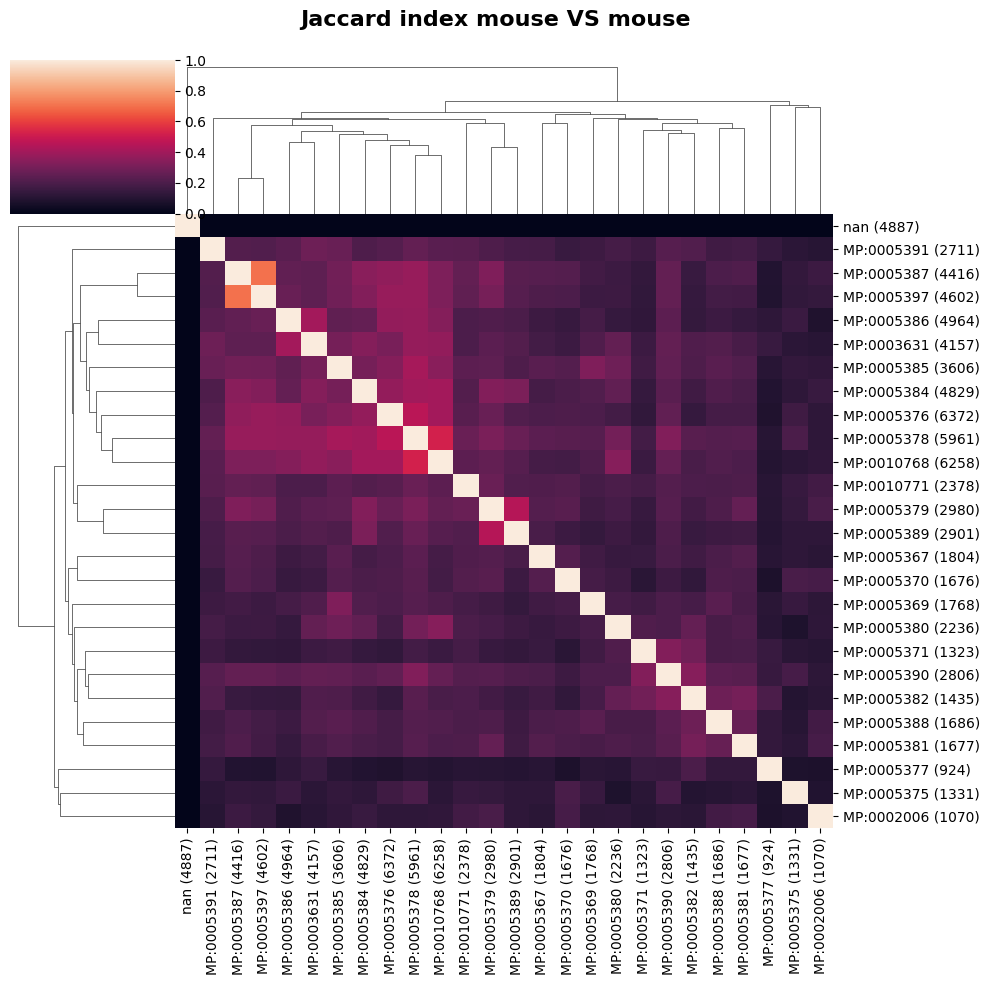

In [146]:
plt.figure(figsize=(10, 8))

sns.clustermap(jcrd_mouse_mouse)
plt.suptitle(
    "Jaccard index mouse VS mouse", 
    weight='bold', 
    size=16
)
plt.subplots_adjust(top=0.93)

plt.savefig(f"{PLOTS_DIR}/concord_12_Jaccard_mouse_mouse_clustered", bbox_inches="tight", dpi=800)
("")

''

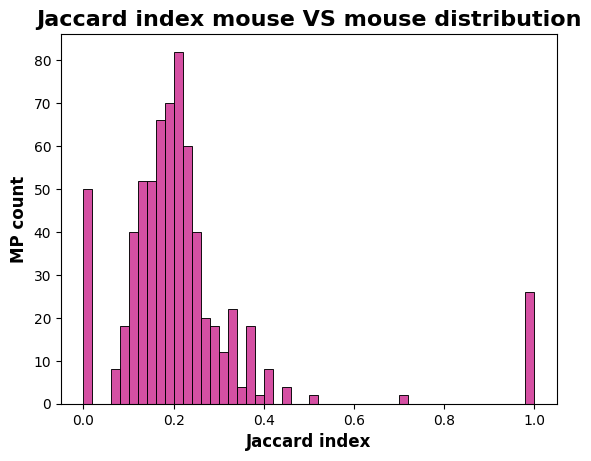

In [147]:
sns.histplot(jcrd_mouse_mouse.to_numpy().flatten(), color="mediumvioletred", bins=50)
plt.xlabel("Jaccard index", weight="bold", size=12)
plt.ylabel("MP count", weight="bold", size=12)

plt.title(
    "Jaccard index mouse VS mouse distribution", 
    weight='bold', 
    size=16
)

plt.savefig(f"{PLOTS_DIR}/concord_13_Jaccard_mouse_mouse_dist", bbox_inches="tight", dpi=800)
("")

In [148]:
# Jaccard index calculation human VS human

jcrd_h_h = [[]]

for term_m in all_mps:
    jcrd_line = []
    for term_h in all_mps:
        jcrd_val = len(
            set(human_mps_dict[term_m]).intersection(set(human_mps_dict[term_h]))
        ) / len(set(human_mps_dict[term_m]).union(set(human_mps_dict[term_h])))
        jcrd_line.append(jcrd_val)
    jcrd_h_h.extend([jcrd_line])

jcrd_human_human = pd.DataFrame(jcrd_h_h[1:], columns=indexes_h, index=indexes_h)

''

<Figure size 1000x800 with 0 Axes>

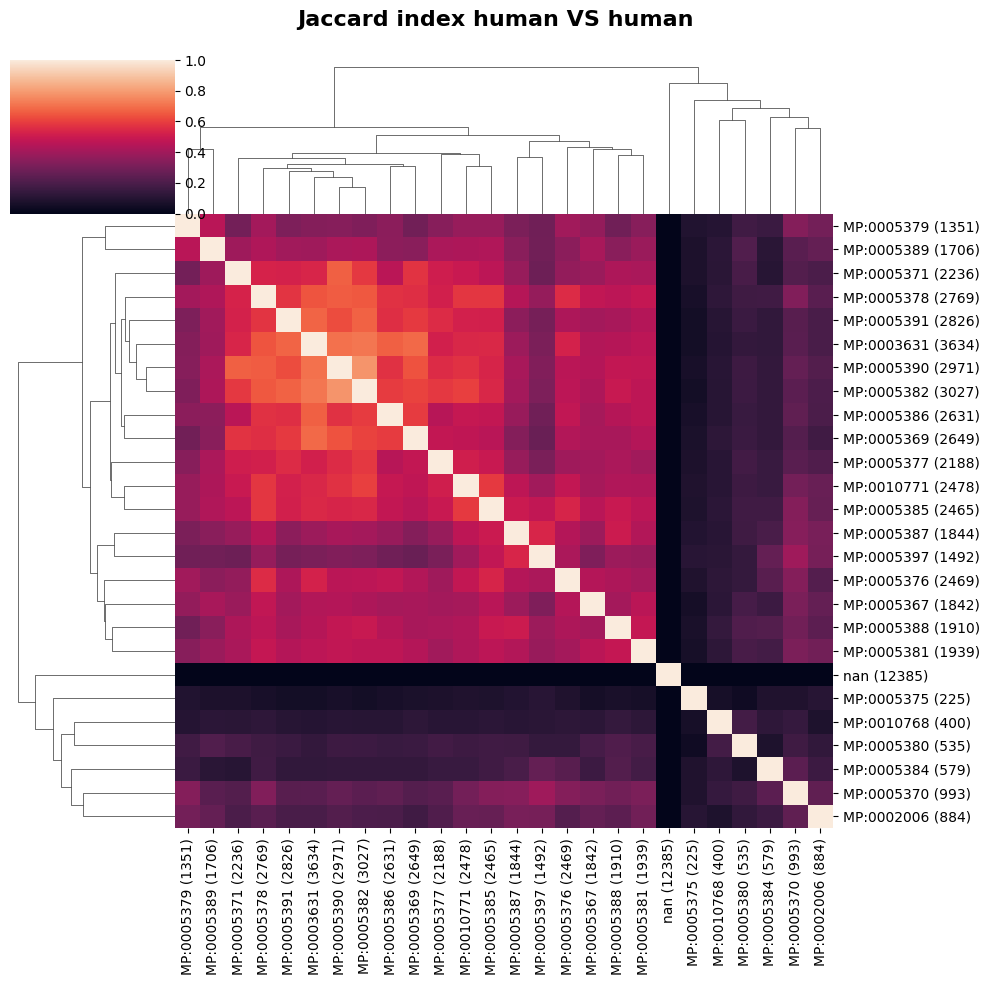

In [149]:
plt.figure(figsize=(10, 8))

sns.clustermap(jcrd_human_human)
plt.suptitle(
    "Jaccard index human VS human", 
    weight='bold', 
    size=16
)
plt.subplots_adjust(top=0.93)

plt.savefig(f"{PLOTS_DIR}/concord_16_Jaccard_human_human_clustered", bbox_inches="tight", dpi=800)
("")

''

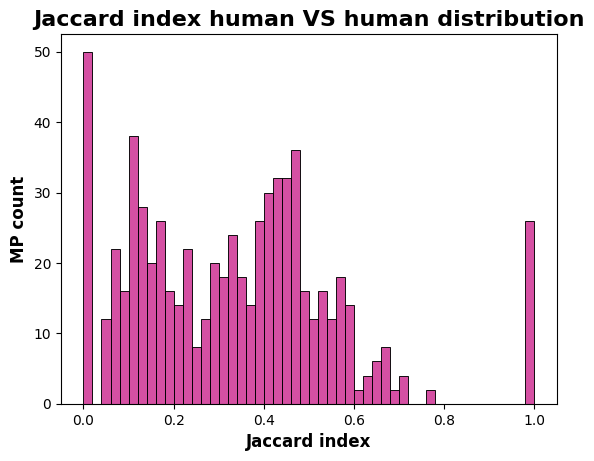

In [150]:
sns.histplot(jcrd_human_human.to_numpy().flatten(), color="mediumvioletred", bins=50)
plt.xlabel("Jaccard index", weight="bold", size=12)
plt.ylabel("MP count", weight="bold", size=12)
plt.title(
    "Jaccard index human VS human distribution", 
    weight='bold', 
    size=16
)

plt.savefig(f"{PLOTS_DIR}/concord_17_Jaccard_human_human_dist", bbox_inches="tight", dpi=800)
("")

In [151]:
# Jaccard indeces for MP terms. Mouse VS human.

# Jaccard index calculation mouse VS human

jcrd_m_h = [[]]

for term_m in all_mps:
    jcrd_line = []
    for term_h in all_mps:
        jcrd_val = len(
            set(mouse_mps_dict[term_m]).intersection(set(human_mps_dict[term_h]))
        ) / len(set(mouse_mps_dict[term_m]).union(set(human_mps_dict[term_h])))
        jcrd_line.append(jcrd_val)
    jcrd_m_h.extend([jcrd_line])

jcrd_mouse_human = pd.DataFrame(jcrd_m_h[1:], columns=indexes_h, index=indexes_m)

''

<Figure size 1000x800 with 0 Axes>

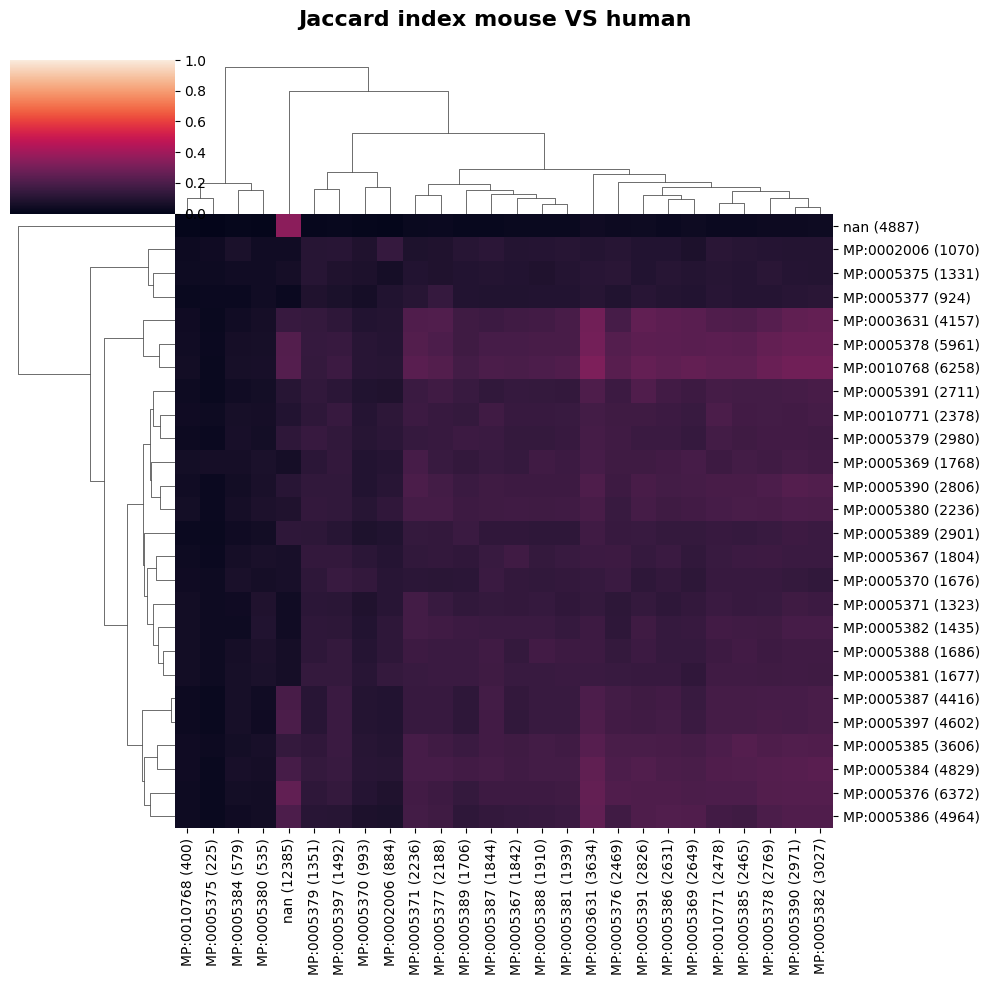

In [152]:
plt.figure(figsize=(10, 8))

sns.clustermap(jcrd_mouse_human, vmin=0, vmax=1)
plt.suptitle(
    "Jaccard index mouse VS human", 
    weight='bold', 
    size=16
)
plt.subplots_adjust(top=0.93)

plt.savefig(f"{PLOTS_DIR}/concord_20_Jaccard_mouse_human_clustered", bbox_inches="tight", dpi=800)
("")

''

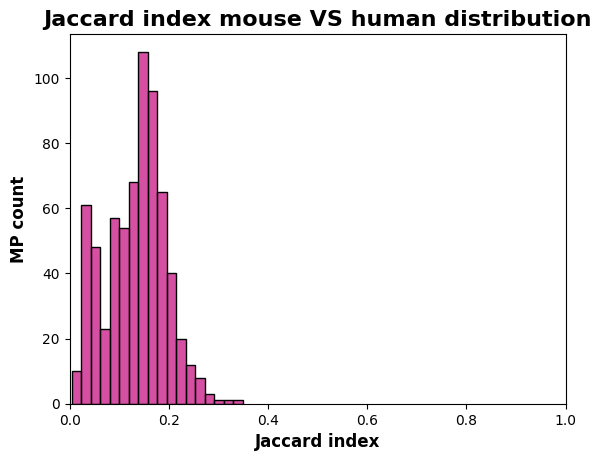

In [153]:
sns.histplot(jcrd_mouse_human.to_numpy().flatten(), color="mediumvioletred", bins=18)
plt.xlabel("Jaccard index", weight="bold", size=12)
plt.ylabel("MP count", weight="bold", size=12)
plt.xlim(0, 1)
plt.title(
    "Jaccard index mouse VS human distribution", 
    weight='bold', 
    size=16
)

plt.savefig(f"{PLOTS_DIR}/concord_21_Jaccard_mouse_human_dist", bbox_inches="tight", dpi=800)
("")

In [154]:
# Sinkevich indexes. Mouse VS mouse.

# Sinkevich index calculation mouse VS mouse

all_mps = list(mouse_mps_dict.keys())

sink_m_m = [[]]

for term_m in all_mps:
    jcrd_line = []
    for term_h in all_mps:
        jcrd_val = len(
            set(mouse_mps_dict[term_m]).intersection(set(mouse_mps_dict[term_h]))
        ) / min(len(set(mouse_mps_dict[term_m])), len(set(mouse_mps_dict[term_h])))
        jcrd_line.append(jcrd_val)
    sink_m_m.extend([jcrd_line])

sink_mouse_mouse = pd.DataFrame(sink_m_m[1:], columns=indexes_m, index=indexes_m)

''

<Figure size 1000x800 with 0 Axes>

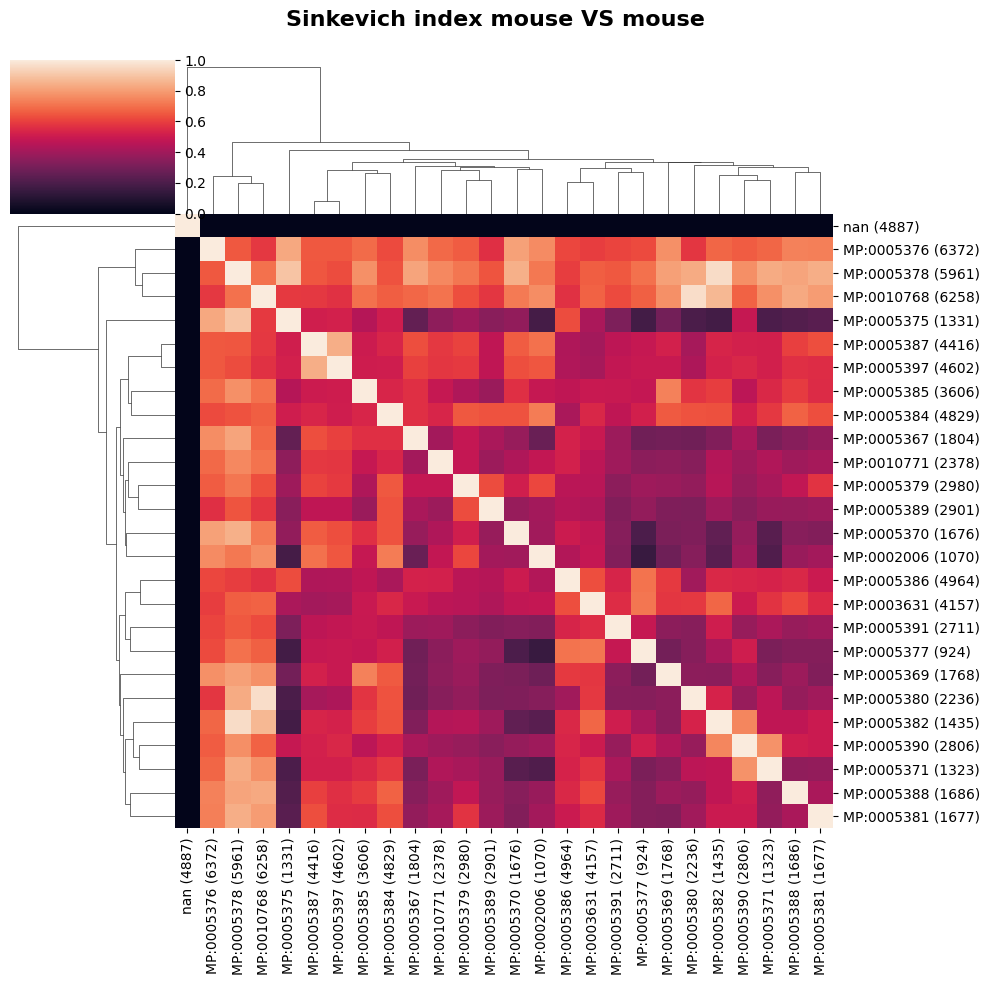

In [155]:
plt.figure(figsize=(10, 8))

sns.clustermap(sink_mouse_mouse)
plt.suptitle(
    "Sinkevich index mouse VS mouse", 
    weight='bold', 
    size=16
)
plt.subplots_adjust(top=0.93)

plt.savefig(f"{PLOTS_DIR}/concord_14_Sinkevich_mouse_mouse_clustered", bbox_inches="tight", dpi=800)
("")

''

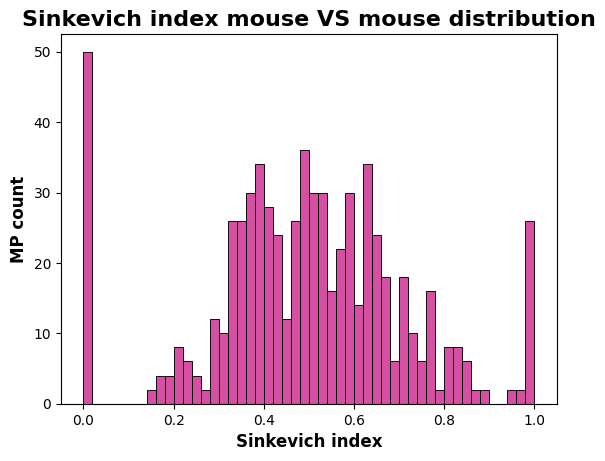

In [156]:
sns.histplot(sink_mouse_mouse.to_numpy().flatten(), color='mediumvioletred', bins=50)
plt.xlabel("Sinkevich index", weight="bold", size=12)
plt.ylabel("MP count", weight="bold", size=12)
plt.title(
    "Sinkevich index mouse VS mouse distribution", 
    weight='bold', 
    size=16
)

plt.savefig(f"{PLOTS_DIR}/concord_15_Sinkevich_mouse_mouse_dist", bbox_inches="tight", dpi=800)
;

In [157]:
# Sinkevich indexes. human VS human.

# Sinkevich index calculation human VS human
sink_h_h = [[]]

for term_m in all_mps:
    jcrd_line = []
    for term_h in all_mps:
        jcrd_val = len(
            set(human_mps_dict[term_m]).intersection(set(human_mps_dict[term_h]))
        ) / min(len(set(human_mps_dict[term_m])), len(set(human_mps_dict[term_h])))
        jcrd_line.append(jcrd_val)
    sink_h_h.extend([jcrd_line])

sink_human_human = pd.DataFrame(sink_h_h[1:], columns=indexes_h, index=indexes_h)

''

<Figure size 1000x800 with 0 Axes>

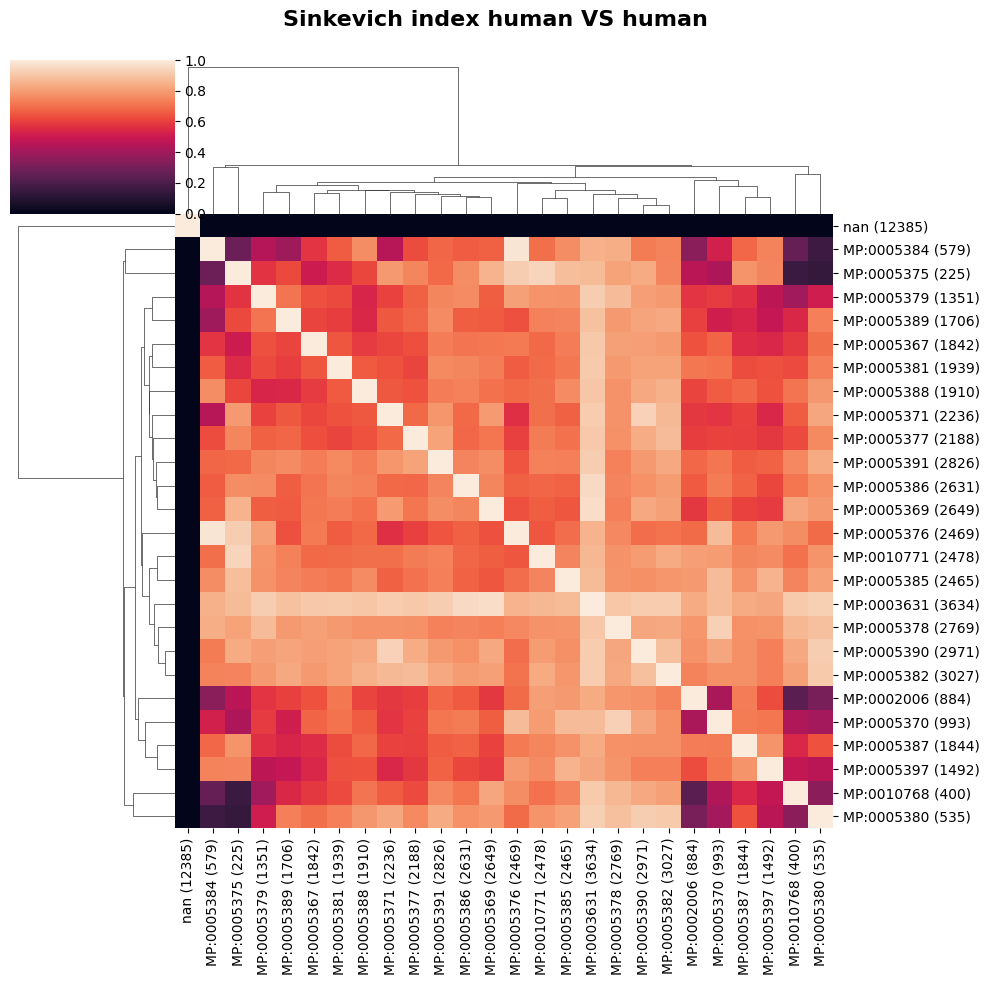

In [158]:
plt.figure(figsize=(10, 8))

sns.clustermap(sink_human_human)
plt.suptitle(
    "Sinkevich index human VS human", 
    weight='bold', 
    size=16
)
plt.subplots_adjust(top=0.93)

plt.savefig(f"{PLOTS_DIR}/concord_18_Sinkevich_human_human_clustered", bbox_inches="tight", dpi=800)
("")

''

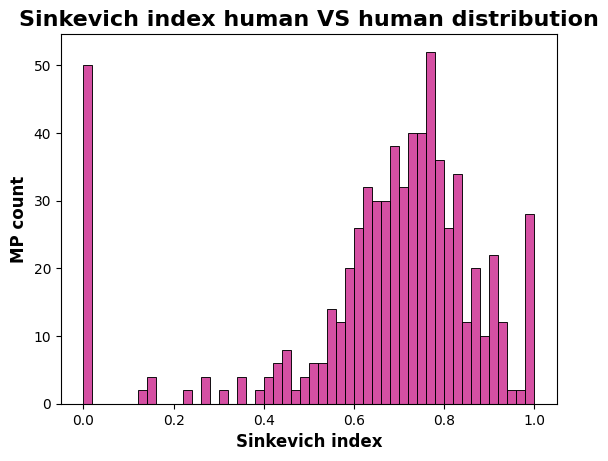

In [159]:
sns.histplot(sink_human_human.to_numpy().flatten(), color="mediumvioletred", bins=50)
plt.xlabel("Sinkevich index", weight="bold", size=12)
plt.ylabel("MP count", weight="bold", size=12)
plt.title(
    "Sinkevich index human VS human distribution", 
    weight='bold', 
    size=16
)

plt.savefig(f"{PLOTS_DIR}/concord_19_Sinkevich_human_human_dist", bbox_inches="tight", dpi=800)
("")

In [160]:
# Sinkevich indexes. Mouse VS human.
# Sinkevich index calculation mouse VS human

sink_m_h = [[]]

for term_m in all_mps:
    jcrd_line = []
    for term_h in all_mps:
        jcrd_val = len(
            set(mouse_mps_dict[term_m]).intersection(set(human_mps_dict[term_h]))
        ) / min(len(set(mouse_mps_dict[term_m])), len(set(human_mps_dict[term_h])))
        jcrd_line.append(jcrd_val)
    sink_m_h.extend([jcrd_line])

sink_mouse_human = pd.DataFrame(sink_m_h[1:], columns=indexes_h, index=indexes_m)

''

<Figure size 1000x800 with 0 Axes>

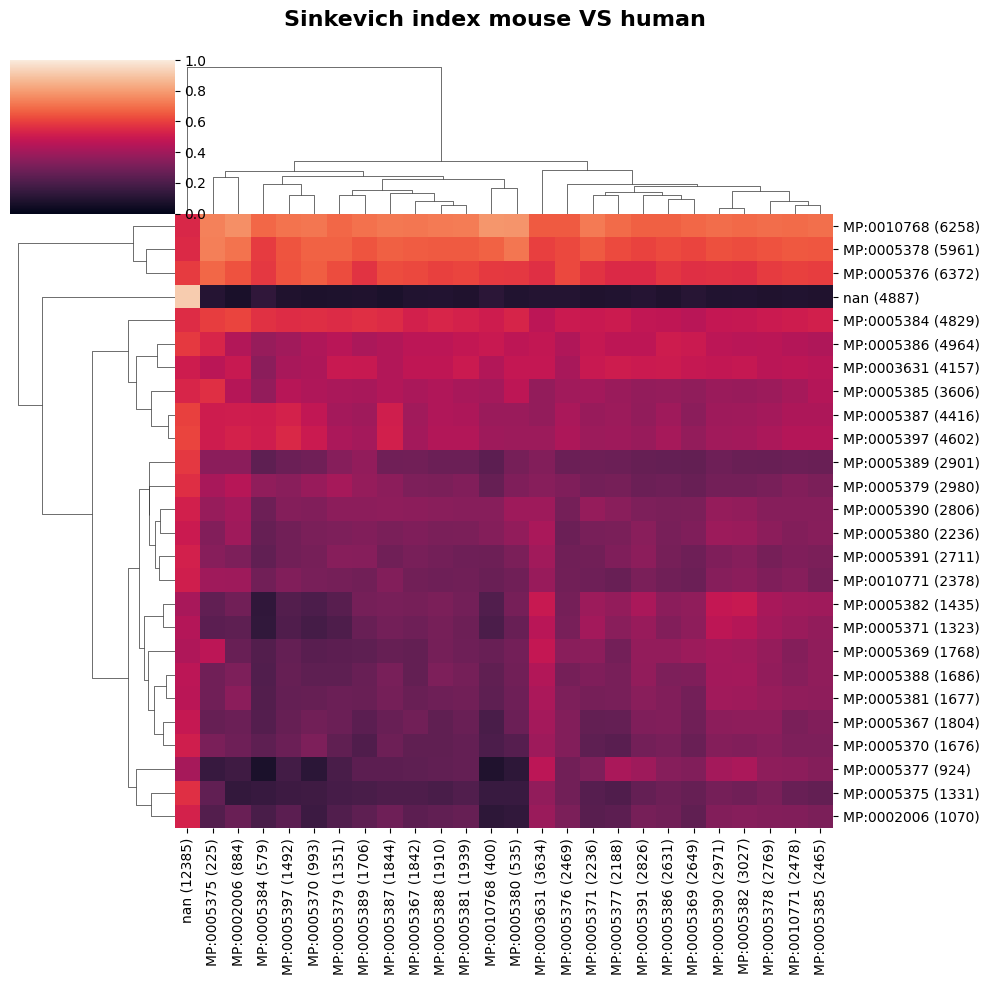

In [161]:
plt.figure(figsize=(10, 8))

sns.clustermap(sink_mouse_human, vmin=0, vmax=1)
plt.suptitle(
    "Sinkevich index mouse VS human", 
    weight='bold', 
    size=16
)
plt.subplots_adjust(top=0.93)

plt.savefig(f"{PLOTS_DIR}/concord_22_Sinkevich_mouse_human_clustered", bbox_inches="tight", dpi=800)
("")

''

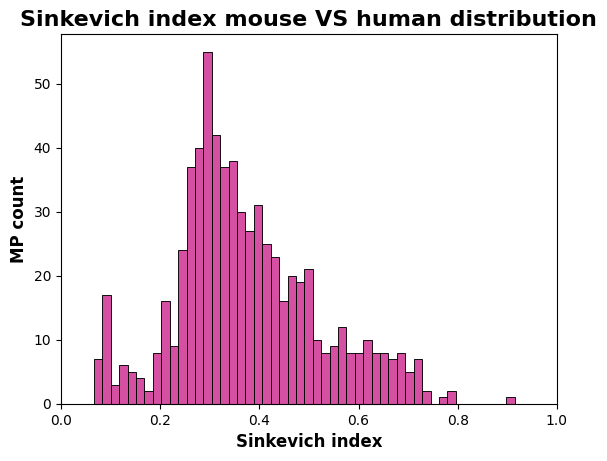

In [162]:
sns.histplot(sink_mouse_human.to_numpy().flatten(), color="mediumvioletred", bins=50)
plt.xlabel("Sinkevich index", weight="bold", size=12)
plt.ylabel("MP count", weight="bold", size=12)
plt.xlim(0, 1)
plt.title(
    "Sinkevich index mouse VS human distribution", 
    weight='bold', 
    size=16
)

plt.savefig(f"{PLOTS_DIR}/concord_23_Sinkevich_mouse_human_dist", bbox_inches="tight", dpi=800)
("")

#### Constraint analysis between genes corresponding to "from mouse", "from human", "intersect (from both mouse and human)" categories in both contribute gene group (3115 genes) for following MPs:

MP:0005378 growth/size/body region phenotype

MP:0005387 immune system phenotype

MP:0005379 endocrine/exocrine gland phenotype

MP:0005370 liver/biliary system phenotype

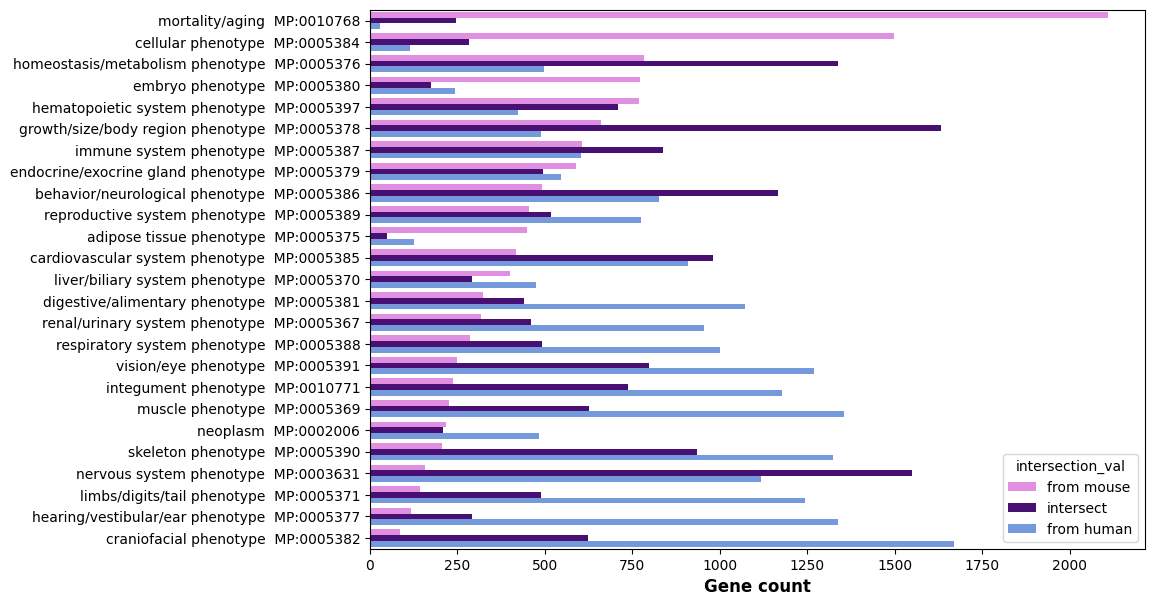

''

In [163]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=mp_count_intersect_df_source,
    y="MP_term",
    x="gene_count",
    hue="intersection_val",
    palette=["violet", "indigo", "cornflowerblue"],
)
plt.yticks(
    ticks=[i for i in range(25)],
    labels=[
        f"{mpo.label(mp_count_intersect_df_source[:25].MP_term.tolist()[i])}  {mp_count_intersect_df_source[:25].MP_term.tolist()[i]}"
        for i in range(25)
    ],
    size=10,
)
plt.xlabel("Gene count", weight="bold", size=12)
plt.ylabel("")
plt.show()
("")


In [164]:
# MP:0005378 growth/size/body region phenotype
# new df with genes that are associated with MP:0005378
# column MP_growth for hue, values "from mouse", "from human", "intersect"

intersect_growth_m = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(lambda x: "MP:0005378" in x["from_mouse"], axis=1)
]
intersect_growth_h = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(lambda x: "MP:0005378" in x["from_human"], axis=1)
]
intersect_growth_i = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(
        lambda x: "MP:0005378" in x["intersection"], axis=1
    )
]

intersect_growth_m["MP_growth"] = "from mouse"
intersect_growth_h["MP_growth"] = "from human"
intersect_growth_i["MP_growth"] = "intersect"

intersect_growth = pd.concat(
    [intersect_growth_m, intersect_growth_h, intersect_growth_i]
)

intersect_growth = intersect_growth.merge(
    gnomad_data, how="left", left_on="gene_human", right_on="gene"
)

print(f"intersect_growth shape: {intersect_growth.shape}")
intersect_growth.to_csv("../intermediate_data/constraint_growth.csv")
intersect_growth.head()

/tmp/ipykernel_52830/1031143834.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_growth_m["MP_growth"] = "from mouse"
/tmp/ipykernel_52830/1031143834.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_growth_h["MP_growth"] = "from human"
/tmp/ipykernel_52830/1031143834.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

intersect_growth shape: (2784, 26)


,gene_human,entrez_id_human,gene_mouse,MGI,MP_HMD,MP_PhenoGeno,HP_genes_to_phenotype,MP_system_level,HP_system_level,MP_from_HP_system_level,...,intersection,not_intersection,from_mouse,from_human,MPs_union,MP_growth,gene,oe_lof_upper,pLI,mis_z
0,ABCA2,20,Abca2,MGI:99606,"MP:0005378,MP:0003631,MP:0005376,MP:0005386,MP...","MP:0002574,MP:0001566,MP:0010053,MP:0009763,MP...","HP:0002066,HP:0002311,HP:0000252,HP:0000519,HP...","MP:0005378,MP:0003631,MP:0005389,MP:0005386,MP...","HP:0001574,HP:0003011,HP:0000478,HP:0000924,HP...","MP:0005390,MP:0003631,MP:0005391,MP:0005386,MP...",...,"{MP:0003631, MP:0005386, MP:0005376}","{MP:0010771, MP:0005389, MP:0005378, MP:000539...","{MP:0005378, MP:0010768, MP:0005389}","{MP:0010771, MP:0005382, MP:0005391, MP:000539...","{MP:0010771, MP:0005386, MP:0005389, MP:000537...",from mouse,ABCA2,0.169,1.000000e+00,4.91160
1,ABCG5,64240,Abcg5,MGI:1351659,"MP:0005378,MP:0005397,MP:0005376,MP:0005386,MP...","MP:0002083,MP:0000221,MP:0002640,MP:0010078,MP...","HP:0000007,HP:0033341,HP:0010874,HP:0010874,HP...","MP:0005397,MP:0005378,MP:0005376,MP:0005386,MP...","HP:0001574,HP:0010766,HP:0000478,HP:0000234,HP...","MP:0005390,MP:0003631,MP:0005391,MP:0005376,MP...",...,"{MP:0005386, MP:0005370, MP:0005376, MP:0005385}","{MP:0010771, MP:0005388, MP:0005389, MP:000536...","{MP:0005389, MP:0005378, MP:0005384, MP:000538...","{MP:0010771, MP:0005388, MP:0005382, MP:000539...","{MP:0010771, MP:0005386, MP:0005382, MP:000539...",from mouse,ABCG5,1.385,3.081000e-21,-0.74377
2,ACBD5,91452,Acbd5,MGI:1921409,"MP:0005390,MP:0005378,MP:0003631,MP:0005397,MP...","MP:0005565,MP:0005419,MP:0000160,MP:0002118,MP...","HP:0030147,HP:0001310,HP:0002515,HP:0001260,HP...","MP:0005390,MP:0005378,MP:0003631,MP:0005397,MP...","HP:0003011,HP:0000478,HP:0000707,HP:0000234,HP...","MP:0005390,MP:0003631,MP:0005391,MP:0005376,MP...",...,"{MP:0005391, MP:0003631, MP:0005376, MP:0005390}","{MP:0005386, MP:0005389, MP:0005382, MP:000537...","{MP:0005386, MP:0005389, MP:0005378, MP:000537...","{MP:0005377, MP:0005382, MP:0005369}","{MP:0005386, MP:0005382, MP:0005391, MP:000537...",from mouse,ACBD5,0.529,6.148000e-03,0.87301
3,ACE,1636,Ace,MGI:87874,"MP:0005378,MP:0005397,MP:0005379,MP:0005376,MP...","MP:0002083,MP:0009647,MP:0011423,MP:0013254,MP...","HP:0008660,HP:0004492,HP:0000252,HP:0000007,HP...","MP:0005397,MP:0005378,MP:0005379,MP:0005376,MP...","HP:0000079,HP:0000707,HP:0002086,HP:0001560,HP...","MP:0005390,MP:0003631,MP:0005367,MP:0005380,MP...",...,"{MP:0005385, MP:0005380, MP:0005367}","{MP:0005386, MP:0005382, MP:0005375, MP:000538...","{MP:0005386, MP:0005376, MP:0005389, MP:000537...","{MP:0005382, MP:0003631, MP:0005388, MP:0005390}","{MP:0005386, MP:0005382, MP:0005375, MP:000538...",from mouse,ACE,1.081,1.034400e-37,-0.69323
4,ACSL4,2182,Acsl4,MGI:1354713,"MP:0005390,MP:0005378,MP:0005397,MP:0005379,MP...","MP:0004896,MP:0003179,MP:0009082,MP:0002169,MP...","HP:0000233,HP:0000365,HP:0000494,HP:0000486,HP...","MP:0005390,MP:0005378,MP:0005397,MP:0005379,MP...","HP:0001574,HP:0040064,HP:0003011,HP:0000478,HP...","MP:0005390,MP:0005397,MP:0003631,MP:0005391,MP...",...,"{MP:0005371, MP:0005397, MP:0005376, MP:000539...","{MP:0010771, MP:0005386, MP:0005389, MP:000538...","{MP:0005378, MP:0010768, MP:0005379, MP:0005389}","{MP:0010771, MP:0005386, MP:0005382, MP:000539...","{MP:0010771, MP:0005371, MP:0005386, MP:000538...",from mouse,ACSL4,0.306,9.810300e-01,2.59090


In [165]:
# MP:0005387 immune system phenotype
# new df with genes that are associated with MP:0005387
# column MP_immune for hue, values "from mouse", "from human", "intersect"

intersect_immune_m = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(lambda x: "MP:0005387" in x["from_mouse"], axis=1)
]
intersect_immune_h = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(lambda x: "MP:0005387" in x["from_human"], axis=1)
]
intersect_immune_i = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(
        lambda x: "MP:0005387" in x["intersection"], axis=1
    )
]

intersect_immune_m["MP_immune"] = "from mouse"
intersect_immune_h["MP_immune"] = "from human"
intersect_immune_i["MP_immune"] = "intersect"

intersect_immune = pd.concat(
    [intersect_immune_m, intersect_immune_h, intersect_immune_i]
)

intersect_immune = intersect_immune.merge(
    gnomad_data, how="left", left_on="gene_human", right_on="gene"
)

print(
    intersect_immune_m.shape[0],
    intersect_immune_h.shape[0],
    intersect_immune_i.shape[0],
    intersect_immune.shape[0],
)

intersect_immune.to_csv("../intermediate_data/constraint_immune.csv")

605 602 839 2046


/tmp/ipykernel_52830/1276802605.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_immune_m["MP_immune"] = "from mouse"
/tmp/ipykernel_52830/1276802605.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_immune_h["MP_immune"] = "from human"
/tmp/ipykernel_52830/1276802605.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [166]:
# new df with genes that are associated with MP:0005379
# column MP_gland for hue, values "from mouse", "from human", "intersect"

intersect_gland_m = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(lambda x: "MP:0005379" in x["from_mouse"], axis=1)
]
intersect_gland_h = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(lambda x: "MP:0005379" in x["from_human"], axis=1)
]
intersect_gland_i = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(
        lambda x: "MP:0005379" in x["intersection"], axis=1
    )
]

intersect_gland_m["MP_gland"] = "from mouse"
intersect_gland_h["MP_gland"] = "from human"
intersect_gland_i["MP_gland"] = "intersect"

intersect_gland = pd.concat([intersect_gland_m, intersect_gland_h, intersect_gland_i])

intersect_gland = intersect_gland.merge(
    gnomad_data, how="left", left_on="gene_human", right_on="gene"
)

print(
    intersect_gland_m.shape[0],
    intersect_gland_h.shape[0],
    intersect_gland_i.shape[0],
    intersect_gland.shape[0],
)

intersect_gland.to_csv("../intermediate_data/constraint_gland.csv")

588 547 495 1630


/tmp/ipykernel_52830/2487500086.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_gland_m["MP_gland"] = "from mouse"
/tmp/ipykernel_52830/2487500086.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_gland_h["MP_gland"] = "from human"
/tmp/ipykernel_52830/2487500086.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [167]:
# new df with genes that are associated with MP:0005370
# column MP_liver for hue, values "from mouse", "from human", "intersect"
intersect_liver_m = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(lambda x: "MP:0005370" in x["from_mouse"], axis=1)
]
intersect_liver_h = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(lambda x: "MP:0005370" in x["from_human"], axis=1)
]
intersect_liver_i = g_b_both_contr_intersect_df[
    g_b_both_contr_intersect_df.apply(
        lambda x: "MP:0005370" in x["intersection"], axis=1
    )
]

intersect_liver_m["MP_liver"] = "from mouse"
intersect_liver_h["MP_liver"] = "from human"
intersect_liver_i["MP_liver"] = "intersect"

intersect_liver = pd.concat([intersect_liver_m, intersect_liver_h, intersect_liver_i])

intersect_liver = intersect_liver.merge(
    gnomad_data, how="left", left_on="gene_human", right_on="gene"
)

print(
    intersect_liver_m.shape[0],
    intersect_liver_h.shape[0],
    intersect_liver_i.shape[0],
    intersect_liver.shape[0],
)

intersect_liver.to_csv("../intermediate_data/constraint_liver.csv")

399 474 291 1164


/tmp/ipykernel_52830/4029845117.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_liver_m["MP_liver"] = "from mouse"
/tmp/ipykernel_52830/4029845117.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersect_liver_h["MP_liver"] = "from human"
/tmp/ipykernel_52830/4029845117.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

''

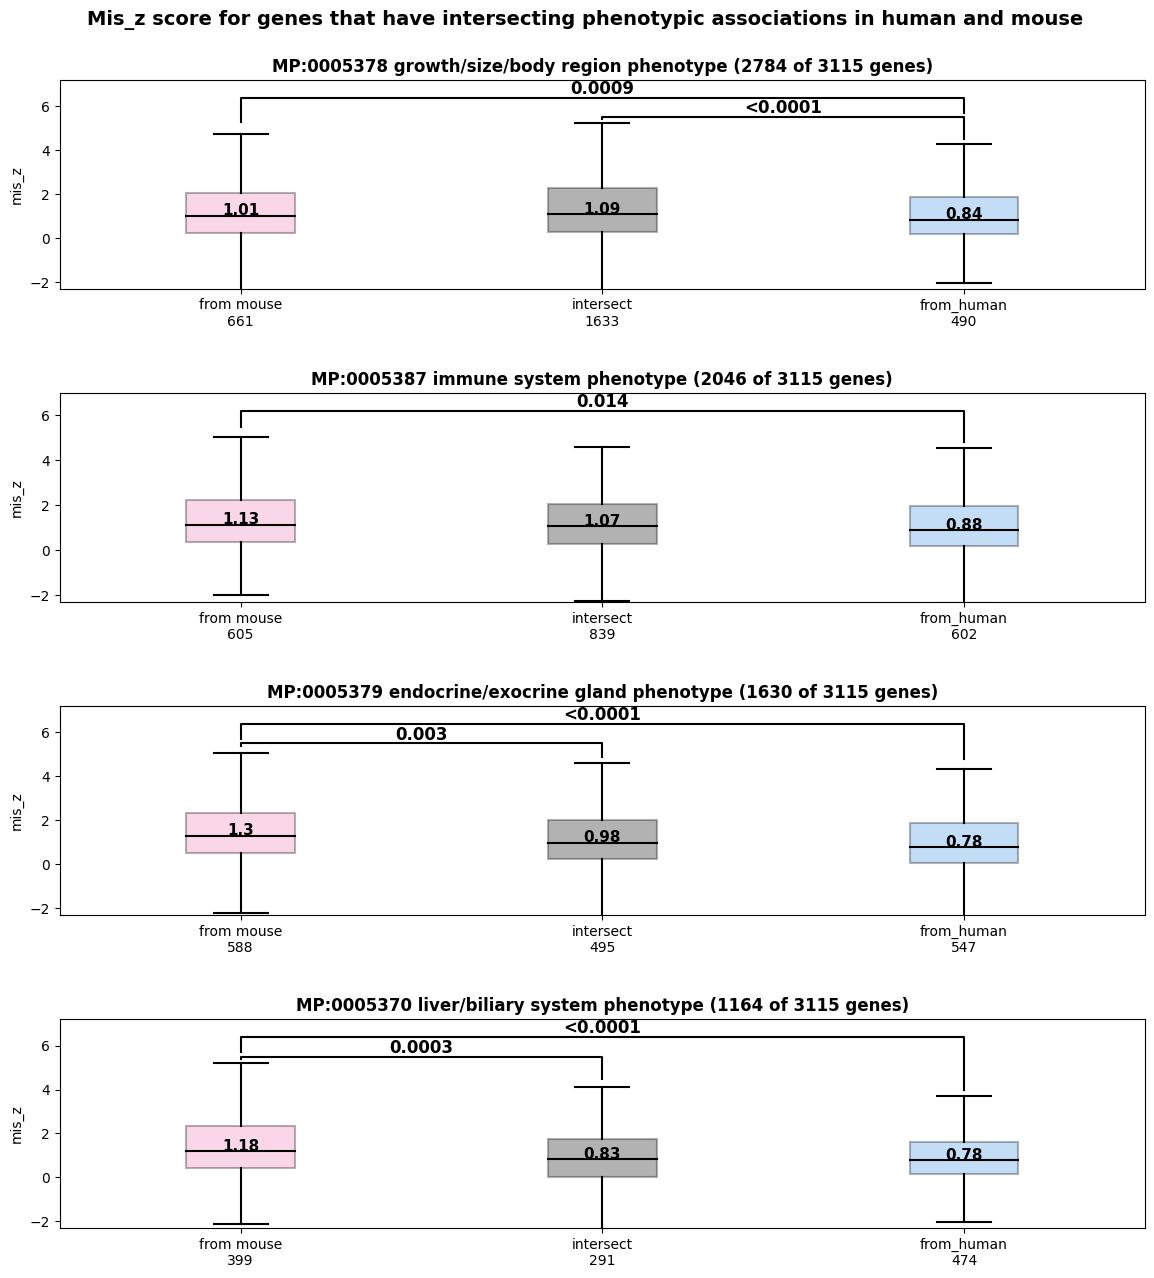

In [168]:
plt.figure(figsize=(14, 14))

groups = ["from mouse", "intersect", "from human"]
palette_groups = ["hotpink", "black", "dodgerblue"]
ticks_groups = [0, 1, 2]

plt.subplot(4, 1, 4)
sns.boxplot(
    data=intersect_liver, 
    x="MP_liver", 
    y="mis_z", 
    width=0.3, 
    showfliers=False,
    order=groups,
    palette=palette_groups,
    boxprops=dict(alpha=0.3)
)
plt.xticks(ticks=ticks_groups, labels=["from mouse\n399", "intersect\n291", "from_human\n474"])
plt.xlabel(None)
medians = []
for i in ['from mouse', 'intersect', 'from human']:
    medians.append(intersect_liver[intersect_liver.MP_liver == i].mis_z.median())

for i in range(3):
    plt.text(i, medians[i] + 0.02, str(round(medians[i], 2)),
    horizontalalignment='center', weight='semibold',
    size=11)

plt.title("MP:0005370 liver/biliary system phenotype (1164 of 3115 genes)", size=12, weight="bold")

plt.plot([0, 0, 1, 1], [5.4, 5.5, 5.5, 4.5], lw=1.5, c='k')
plt.plot([0, 0, 2, 2], [5.7, 6.4, 6.4, 4], lw=1.5, c='k')
plt.ylim([-2.3, 7.2])
plt.text((0 + 1) * 0.5, 5.5, "0.0003", ha='center', va='bottom', weight='bold', size=12)
plt.text((0 + 2) * 0.5, 6.4, "<0.0001", ha='center', va='bottom', weight='bold', size=12)

plt.subplot(4, 1, 1)
sns.boxplot(
    data=intersect_growth, 
    x="MP_growth", 
    y="mis_z", 
    width=0.3, 
    showfliers=False,
    order=groups,
    palette=palette_groups,
    boxprops=dict(alpha=0.3)
)
plt.xticks(ticks=ticks_groups, labels=["from mouse\n661", "intersect\n1633", "from_human\n490"])
plt.xlabel(None)
medians = []
for i in ['from mouse', 'intersect', 'from human']:
    medians.append(intersect_growth[intersect_growth.MP_growth == i].mis_z.median())
    
for i in range(3):
    plt.text(i, medians[i] + 0.02, str(round(medians[i], 2)),
    horizontalalignment='center', weight='semibold',
    size=11)

plt.title("MP:0005378 growth/size/body region phenotype (2784 of 3115 genes)", size=12, weight="bold")

plt.plot([1, 1, 2, 2], [5.4, 5.5, 5.5, 4.5], lw=1.5, c='k')
plt.plot([0, 0, 2, 2], [5.3, 6.4, 6.4, 5.7], lw=1.5, c='k')
plt.ylim([-2.3, 7.2])
plt.text((1 + 2) * 0.5, 5.5, "<0.0001", ha='center', va='bottom', weight='bold', size=12)
plt.text((0 + 2) * 0.5, 6.4, "0.0009", ha='center', va='bottom', weight='bold', size=12)


plt.subplot(4, 1, 3)
sns.boxplot(
    data=intersect_gland, 
    x="MP_gland", 
    y="mis_z", 
    width=0.3, 
    showfliers=False,
    order=groups,
    palette=palette_groups,
    boxprops=dict(alpha=0.3)
)
plt.xticks(ticks=ticks_groups, labels=["from mouse\n588", "intersect\n495", "from_human\n547"])
plt.xlabel(None)
medians = []
for i in ['from mouse', 'intersect', 'from human']:
    medians.append(intersect_gland[intersect_gland.MP_gland == i].mis_z.median())

for i in range(3):
    plt.text(i, medians[i] + 0.02, str(round(medians[i], 2)),
    horizontalalignment='center', weight='semibold',
    size=11)

plt.title("MP:0005379 endocrine/exocrine gland phenotype (1630 of 3115 genes)", size=12, weight="bold")

plt.plot([0, 0, 1, 1], [5.4, 5.5, 5.5, 4.9], lw=1.5, c='k')
plt.plot([0, 0, 2, 2], [5.7, 6.4, 6.4, 4.8], lw=1.5, c='k')
plt.ylim([-2.3, 7.2])
plt.text((0 + 1) * 0.5, 5.5, "0.003", ha='center', va='bottom', weight='bold', size=12)
plt.text((0 + 2) * 0.5, 6.4, "<0.0001", ha='center', va='bottom', weight='bold', size=12)


plt.subplot(4, 1, 2)
sns.boxplot(
    data=intersect_immune, 
    x="MP_immune", 
    y="mis_z", 
    width=0.3, 
    showfliers=False,
    order=groups,
    palette=palette_groups,
    boxprops=dict(alpha=0.3)
)
plt.xticks(ticks=ticks_groups, labels=["from mouse\n605", "intersect\n839", "from_human\n602"])
plt.xlabel(None)
medians = []
for i in ['from mouse', 'intersect', 'from human']:
    medians.append(intersect_immune[intersect_immune.MP_immune == i].mis_z.median())

for i in range(3):
    plt.text(i, medians[i] + 0.02, str(round(medians[i], 2)),
    horizontalalignment='center', weight='semibold',
    size=11)

plt.title("MP:0005387 immune system phenotype (2046 of 3115 genes)", size=12, weight="bold")

plt.plot([0, 0, 2, 2], [5.5, 6.2, 6.2, 4.8], lw=1.5, c='k')
plt.ylim([-2.3, 7])
plt.text((0 + 2) * 0.5, 6.2, "0.014", ha='center', va='bottom', weight='bold', size=12)


plt.suptitle("Mis_z score for genes that have intersecting phenotypic associations in human and mouse", size=14, weight="bold")

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(top=0.93)

plt.savefig(
    f"{PLOTS_DIR}/concord_11_constraint_liver_gland_immune_growth", 
    bbox_inches="tight", 
    dpi=800
)
("")